# Finformer - Data

In [11]:
import os
import requests
from dotenv import load_dotenv
import json
import pandas as pd

from tqdm import tqdm, trange

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
load_dotenv()

DATA_DIR = './data'
os.makedirs(DATA_DIR, exist_ok=True)

source_news_path = os.path.join(DATA_DIR, 'analyst_ratings_processed.csv')
news_path = os.path.join(DATA_DIR, 'data-news.csv')
news_tickers_path = os.path.join(DATA_DIR, 'data-news-tickers.json')

source_prices_path = os.path.join(DATA_DIR, 'archive-prices')
prices_path = os.path.join(DATA_DIR, 'data-prices.csv')
prices_tickers_path = os.path.join(DATA_DIR, 'data-prices-tickers.json')

In [178]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
from finformer.utils import FinformerConfig

In [180]:
config = FinformerConfig()

In [339]:
!pwd

/Users/ruastg1/Documents/study/sentiment/finformer


[autoreload of finformer.data.fmp failed: Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 305, in update_function
    setattr(old, name, getattr(new, name))
ValueError: load_news() requires a code object with 1 free vars, not 0
]


In [368]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of finformer.data.fmp failed: Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 305, in update_function
    setattr(old, name, getattr(new, name))
ValueError: load_news() requires a code object with 1 free vars, not 0
]


In [369]:
from finformer.data.fmp import load_data, collect_data

In [276]:
load_data()

REPORT (endpoint=v3/sp500_constituent | status=SUCCESS)
REPORT (endpoint=v3/nasdaq_constituent | status=SUCCESS)
REPORT (endpoint=v4/symbol_change | status=SUCCESS)
REPORT (endpoint=v3/profile | status=EXISTS)
REPORT (endpoint=v3/key-metrics | status=EXISTS)
REPORT (endpoint=v3/historical-price-full | status=EXISTS)
REPORT (endpoint=v3/stock_news | status=EXISTS)


'./data/fmp'

In [370]:
collect_data(force=True)

COLLECTING (key=metrics | filename=ZTS.csv): 100%|██████████| 538/538 [00:11<00:00, 48.60it/s]  
COLLECTING (key=prices | filename=ZTS.csv): 100%|██████████| 537/537 [01:11<00:00,  7.54it/s]  
COLLECTING (key=news | filename=CRM.csv):  24%|██▎       | 127/538 [00:04<00:16, 25.62it/s]  

File ./data/fmp/news/CPAY.csv is empty!


COLLECTING (key=news | filename=ETR.csv):  34%|███▍      | 185/538 [00:07<00:16, 21.59it/s] 

File ./data/fmp/news/ERI.csv is empty!


COLLECTING (key=news | filename=VIAC.csv):  93%|█████████▎| 500/538 [00:37<00:04,  8.95it/s] 

File ./data/fmp/news/UTX.csv is empty!


COLLECTING (key=news | filename=ZTS.csv): 100%|██████████| 538/538 [00:43<00:00, 12.44it/s] 


'./data/raw-dataset'

In [371]:
tickers = pd.read_csv('./data/raw-dataset/tickers.csv')

tickers

,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded,index_name
0,BLDR,Builders FirstSource,Industrials,Building Products,"Irving, Texas",2023-12-18,1316835,1998,sp500
1,JBL,Jabil,Information Technology,Electronic Manufacturing Services,"St. Petersburg, Florida",2023-12-18,898293,1966,sp500
2,UBER,Uber,Industrials,Passenger Ground Transportation,"San Francisco, California",2023-12-18,1543151,2009,sp500
3,HUBB,Hubbell Incorporated,Industrials,Industrial Machinery & Supplies & Components,"Shelton, Connecticut",2023-10-18,48898,1888,sp500
4,LULU,Lululemon Athletica,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Vancouver, Canada",2023-10-18,1397187,1998,sp500
...,...,...,...,...,...,...,...,...,...
511,SPLK,Splunk,Technology,Technology,"San Francisco, CA",NaN,1353283,2003-10-01,nasdaq
512,TEAM,Atlassian,Technology,Technology,"Sydney, NSW",NaN,1650372,2002-01-01,nasdaq
513,TTD,The Trade Desk,Technology,Technology,"Ventura, CA",NaN,1671933,2009-01-01,nasdaq
514,WDAY,"Workday, Inc.",Technology,Technology,"Pleasanton, CA",NaN,1327811,2005-03-01,nasdaq


In [372]:
changes = pd.read_csv('./data/raw-dataset/changes.csv')

changes

,date,name,oldSymbol,newSymbol,symbol
0,2024-03-25,"Corpay, Inc. Common Stock",FLT,CPAY,CPAY
1,2024-03-04,"Healthpeak Properties, Inc. Common Stock",PEAK,DOC,DOC
2,2024-02-01,"Dayforce, Inc. Common Stock",CDAY,DAY,DAY
3,2023-08-30,"Cencora, Inc. Common Stock",ABC,COR,COR
4,2023-07-10,"Everest Group, Ltd. Common Stock",RE,EG,EG
5,2023-05-16,"Revvity, Inc. Common Stock",PKI,RVTY,RVTY
6,2022-11-08,Gen Digital Inc. Common Stock,NLOK,GEN,GEN
7,2022-06-28,"Elevance Health, Inc. Common Stock",ANTM,ELV,ELV
8,2022-06-09,"Meta Platforms, Inc.",FB,META,META
9,2022-05-10,Ball Corporation Common Stock,BLL,BALL,BALL


In [373]:
profile = pd.read_csv('./data/raw-dataset/profile.csv')
metrics = pd.read_csv('./data/raw-dataset/metrics.csv')
prices = pd.read_csv('./data/raw-dataset/prices.csv')
news = pd.read_csv('./data/raw-dataset/news.csv')

In [374]:
profile

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,...,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading,isAdr,isFund,Unnamed: 0
0,NVDA,870.1660,1.744,53847653.0,2.175415e+12,0.16,272.4-974.0,-7.1840,NVIDIA Corporation,USD,...,356.64530,520.704699,https://financialmodelingprep.com/image-stock/...,1999-01-22,False,False,True,False,False,NaN
1,DAY,62.6900,1.296,1429195.0,9.752182e+09,0.00,55.62-75.53,1.7100,Dayforce Inc,USD,...,66.42281,-5.442806,https://financialmodelingprep.com/image-stock/...,2018-04-26,False,False,True,False,False,NaN
2,MKC,76.1000,0.728,2010622.0,2.042102e+10,1.68,59.13-94.39,0.3700,"McCormick & Company, Incorporated",USD,...,15.00556,60.724438,https://financialmodelingprep.com/image-stock/...,1999-04-26,False,False,True,False,False,NaN
3,FDS,423.3350,0.710,259716.0,1.613575e+10,3.92,380.96-488.64,1.8650,FactSet Research Systems Inc.,USD,...,76.22336,345.246640,https://financialmodelingprep.com/image-stock/...,1996-06-28,False,False,True,False,False,NaN
4,AIZ,173.8650,0.508,355133.0,9.037085e+09,2.88,118.45-189.48,0.9850,"Assurant, Inc.",USD,...,-242.73791,415.617911,https://financialmodelingprep.com/image-stock/...,2004-02-05,False,False,True,False,False,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,MMM,92.0000,1.035,5749254.0,5.090921e+10,6.04,71.36288-95.67,0.1700,3M Company,USD,...,-32.66063,124.490634,https://financialmodelingprep.com/image-stock/...,1946-01-14,False,False,True,False,False,537.0
512,WDC,69.6862,1.554,6774509.0,2.272920e+10,0.00,32.01-76.92,-1.6738,Western Digital Corporation,USD,...,82.66162,-11.301617,https://financialmodelingprep.com/image-stock/...,1978-10-31,False,False,True,False,False,538.0
513,ARE,118.4401,1.068,1010869.0,2.071316e+10,5.08,90.73-135.45,2.2001,"Alexandria Real Estate Equities, Inc.",USD,...,63.20222,56.077785,https://financialmodelingprep.com/image-stock/...,1997-05-28,False,False,True,False,False,539.0
514,DPZ,514.4100,0.863,589403.0,1.791464e+10,6.04,285.84-539.97,15.3400,"Domino's Pizza, Inc.",USD,...,290.68967,208.380334,https://financialmodelingprep.com/image-stock/...,2004-07-13,False,False,True,False,False,540.0


In [375]:
metrics.groupby(by='symbol').count().sort_values(by='date')

,date,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
symbol,,,,,,,,,,,,,,,,,,,,,
KVUE,9,9,9,9,9,9,9,7,7,7,...,5,5,7,7,7,9,9,9,9,9
GEHC,9,9,9,9,9,9,9,8,8,8,...,6,6,8,8,8,9,9,9,9,9
VLTO,9,9,9,9,9,9,9,7,7,7,...,6,6,7,7,7,9,9,9,9,9
GFS,14,14,14,14,14,14,14,12,12,12,...,10,10,12,12,12,14,14,14,14,14
DASH,17,17,17,17,17,17,17,16,16,16,...,14,14,16,16,16,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTCH,236,236,236,236,236,236,236,236,236,236,...,234,234,236,236,236,236,236,236,236,236
CTRA,267,267,267,267,267,255,255,259,259,259,...,254,254,259,267,267,267,267,267,267,255
RTX,277,277,277,277,277,260,260,265,265,265,...,259,259,265,277,277,277,277,277,277,260


In [384]:
prices[(prices['symbol'] == 'MTCH') & (prices['date'] >= '2024-01-01')].sort_values(by='date')

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
847099,2024-01-02,51.91,52.74,51.44,52.38,52.38,643799,643799,0.470,0.905410,52.1175,"January 02, 24",0.009054,MTCH
1174000,2024-01-02,35.98,36.72,35.45,36.41,36.41,9218786,9218786,0.430,1.200000,36.1400,"January 02, 24",0.012000,MTCH
1173999,2024-01-03,35.69,36.01,34.89,35.86,35.86,11634094,11634094,0.170,0.476320,35.6125,"January 03, 24",0.004763,MTCH
847098,2024-01-03,51.52,52.41,50.19,52.02,52.02,725901,725901,0.500,0.970500,51.5350,"January 03, 24",0.009705,MTCH
847097,2024-01-04,51.89,52.18,51.33,52.04,52.04,917421,917421,0.150,0.289070,51.8600,"January 04, 24",0.002891,MTCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173922,2024-04-24,31.56,32.02,31.41,31.94,31.94,2608991,2608991,0.380,1.200000,31.7325,"April 24, 24",0.012000,MTCH
847020,2024-04-25,47.62,48.72,47.36,48.10,48.10,563036,563036,0.480,1.010000,47.9500,"April 25, 24",0.010100,MTCH
1173921,2024-04-25,31.33,31.73,31.08,31.69,31.69,4375454,4375454,0.360,1.150000,31.4575,"April 25, 24",0.011500,MTCH
1173920,2024-04-26,32.08,32.30,31.73,31.89,31.89,2583090,2583090,-0.188,-0.592270,32.0000,"April 26, 24",-0.005923,MTCH


In [379]:
df = prices[['symbol', 'date']].value_counts()

df[df > 1]

symbol  date      
CTRA    2016-05-06    2
MTCH    2022-10-04    2
        2022-06-24    2
        2022-06-27    2
        2022-06-28    2
                     ..
RVTY    2018-07-12    2
        2018-07-11    2
        2018-07-10    2
        2018-07-09    2
        2018-07-06    2
Length: 47102, dtype: int64

In [357]:
prices.groupby(by='symbol').count().sort_values(by='date')

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
symbol,,,,,,,,,,,,,
VLTO,147,147,147,147,147,147,147,147,147,147,147,147,147
KVUE,247,247,247,247,247,247,247,247,247,247,247,247,247
GEHC,342,342,342,342,342,342,342,342,342,342,342,342,342
CEG,571,571,571,571,571,571,571,571,571,571,571,571,571
GFS,627,627,627,627,627,627,627,627,627,627,627,627,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603
EQT,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603
EQR,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603


In [364]:
df = prices[['symbol', 'date']].value_counts()

df > 1

symbol  date      
A       2010-01-04    False
NFLX    2017-12-21    False
        2017-12-19    False
        2017-12-18    False
        2017-12-15    False
                      ...  
EQIX    2023-07-11    False
        2023-07-10    False
        2023-07-07    False
        2023-07-06    False
ZTS     2024-04-26    False
Length: 1761218, dtype: bool

In [358]:
news['date'] = pd.to_datetime(news['publishedDate']).dt.date

news.groupby(by='symbol').count().sort_values(by='date')

,publishedDate,title,image,site,text,url,date
symbol,,,,,,,
VLTO,13,13,13,13,13,13,13
PEG,50,50,50,50,50,50,50
BF-B,129,129,129,129,129,129,129
TECH,136,136,136,136,136,136,136
STE,138,138,138,138,138,138,138
...,...,...,...,...,...,...,...
GOOGL,16412,16412,16410,16412,16392,16412,16412
META,17721,17721,17720,17721,17703,17721,17721
TSLA,23099,23099,23099,23099,23090,23099,23099


In [8]:
import yaml


a = dict(
    repo_id = 'halaction/finformer-data',
    context_length = 30,
    prediction_length = 15,
    start_date = '2020-01-01',
    end_date = '2024-04-15',
)

path = os.path.join('config.yaml')
with open(path, 'w', encoding='utf-8') as file:
    yaml.safe_dump(a, file)

In [ ]:
fmp_config_path = os.path.join(SOURCE_DIR, 'fmp-config.yaml')
with open(fmp_config_path, 'r', encoding='utf-8') as file:
    fmp_config = yaml.safe_load(file)

In [520]:
list(filter(None, [1, None, 2]))

[1, 2]

In [64]:
!pwd

/Users/ruastg1/Documents/study/sentiment/finformer


In [505]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [506]:
from finformer.utils import FinformerConfig
from finformer.data.dataset import FinformerData, FinformerDataset

In [507]:
config = FinformerConfig()

In [493]:
data = FinformerData(config, force=True)

SAVING (key=calendar): 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]


In [494]:
data.profile

,age_ipo,symbol_id,sector_id,industry_id,country_id
ticker,,,,,
A,8721,0,6,68,8
AAL,6581,1,7,5,8
AAPL,15636,2,9,28,8
ABBV,3927,3,6,32,8
ABNB,1028,4,2,111,8
...,...,...,...,...,...
YUM,9513,511,2,98,8
ZBH,8106,512,6,67,8
ZBRA,11738,513,9,22,8


In [508]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [515]:
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.3/415.3 kB 1.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 2.1.1
    Uninstalling transformers-2.1.1:
      Successfully uninstalled transformers-2.1.1


In [511]:
dataset = FinformerDataset(data, config)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/z5/xl8q5bpd7y11yy252z2hfl45wqpd2w/T/ipykernel_5412/1188841403.py", line 1, in <module>
    dataset = FinformerDataset(data, config)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/Documents/study/sentiment/finformer/finformer/data/dataset.py", line 347, in __init__
    self.tokenizer = self._get_tokenizer()
                     ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/Documents/study/sentiment/finformer/finformer/data/dataset.py", line 363, in _get_tokenizer
    tokenizer = AutoTokenizer.from_pretrained(self.config.sentiment_model.pretrained_model_name)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/transformers/tokenization_a

In [519]:
dataset[100]

[autoreload of finformer.data.fmp failed: Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 305, in update_function
    setattr(old, name, getattr(new, name))
ValueError: load_news() requires a code object with 1 free vars, not 0
]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/z5/xl8q5bpd7y11yy252z2hfl45wqpd2w/T/ipykernel_5412/2152658252.py", line 1, in <module>
    dataset[100]
    ~~~~~~~^^^^^
  File "/Users/ruastg1/Documents/study/sentiment/finformer/finformer/data/dataset.py", line 361, in __getitem__
    batch_text, batch_num = self.get_batch(ticker_index, date_index)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/Documents/study/sentiment/finformer/finformer/data/dataset.py", line 382, in get_batch
    batch_encoding, text_date, length = self.get_text(ticker_index, date_index)
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/Documents/study/sentiment/finformer/finformer/data/dataset.py", line 430, in get_text
    batch_encoding =

In [470]:
def collate_fn(batch):
    
    print(len(batch))
    
    batch_text, batch_num = zip(*batch)
    
    return batch_text, batch_num

In [471]:
dataloader = DataLoader(dataset=dataset, batch_size=4, collate_fn=collate_fn)

In [472]:
for i, batch in enumerate(dataloader):
    print(batch)
    
    if i > 1:
        break

4
(({'text': [], 'text_pair': [], 'text_date': DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)}, {'text': [], 'text_pair': [], 'text_date': DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)}, {'text': ['Builders FirstSource (BLDR) Gains But Lags Market: What You Should Know', "Weekly Research Analysts' Ratings Updates for Builders FirstSource (BLDR)", 'Bank of America Corp DE Sells 106,609 Shares of Builders FirstSource, Inc. (NASDAQ:BLDR)', 'Builders FirstSource (BLDR) Gains But Lags Market: What You Should Know', 'Builders FirstSource (BLDR) Gains But Lags Market: What You Should Know', 'Builders FirstSource (NASDAQ:BLDR) Trading Down 0.4%', 'Connor Clark & Lunn Investment Management Ltd. Purchases Shares of 49,700 Builders FirstSource, Inc. (NASDAQ:BLDR)', 'Cubist Systematic Strategies LLC Raises Stock Holdings in Builders FirstSource, Inc. (NASDAQ:BLDR)', 'Nuveen Asset Management LLC Purchases 57,066 Shares of Builders FirstSource, Inc. (

In [463]:
for i, batch in enumerate(dataset):
    print(batch)
    
    if i > 10:
        break

({'text': [], 'text_pair': [], 'text_date': DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)}, {'past_values': tensor([[[    nan,     nan],
         [25.5900, 25.4100],
         [25.0000, 25.2200],
         [    nan,     nan],
         [    nan,     nan],
         [25.4800, 25.7400],
         [25.6300, 25.9250],
         [26.0000, 26.1900],
         [26.2900, 26.2900],
         [26.3800, 26.3700],
         [    nan,     nan],
         [    nan,     nan],
         [26.5100, 26.7900],
         [26.6000, 26.4300],
         [26.4500, 27.1100],
         [27.2800, 27.0300],
         [27.2500, 26.8200],
         [    nan,     nan],
         [    nan,     nan],
         [    nan,     nan],
         [26.8500, 27.1300],
         [27.2400, 26.8700],
         [26.9400, 26.9200],
         [27.0100, 26.3500],
         [    nan,     nan],
         [    nan,     nan],
         [25.7900, 26.4750],
         [26.5400, 26.9900],
         [27.0700, 26.3600],
         [26.2000, 26.0800

In [458]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [459]:
from torch.utils.data import Dataset, DataLoader

In [461]:
dataloader = DataLoader(dataset=dataset, collate_fn=collate_fn)

In [462]:
for i, batch in enumerate(dataloader):
    print(batch)
    
    if i > 10:
        break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

In [68]:
a = 1, 2, 3 if False else None

a

(1, 2, None)

In [69]:
if True:
    a = *a, 1
    
a

(1, 2, None, 1)

In [70]:
a += (1, 2)

a

(1, 2, None, 1, 1, 2)

In [72]:
a += (1, )

a

(1, 2, None, 1, 1, 2, 1)

In [20]:
df = pd.read_csv('data/dataset/tickers.csv')

tickers = df['symbol'].unique().tolist()

In [31]:
len(tickers)

520

In [26]:
import os
import requests

In [27]:
url = 'https://financialmodelingprep.com/api/v4/symbol_change?apikey=QquKlwpD1rQJdovwACVNGLMl8I4CetB4'

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [28]:
df = df[df['newSymbol'].isin(tickers)]

In [32]:
df.head(25)

,date,name,oldSymbol,newSymbol
11,2024-04-02,GE Vernova Inc. Common Stock,GEV.V,GEV
14,2024-04-01,Solventum Corporation Common Stock,SOLV.V,SOLV
24,2024-03-25,"Corpay, Inc. Common Stock",FLT,CPAY
38,2024-03-04,"Healthpeak Properties, Inc. Common Stock",PEAK,DOC
71,2024-02-01,"Dayforce, Inc. Common Stock",CDAY,DAY
161,2023-10-02,Veralto Corp Common Stock,VLTO.V,VLTO
191,2023-08-30,"Cencora, Inc. Common Stock",ABC,COR
234,2023-07-10,"Everest Group, Ltd. Common Stock",RE,EG
261,2023-06-07,"Fiserv, Inc. Common Stock",FISV,FI
277,2023-05-16,"Revvity, Inc. Common Stock",PKI,RVTY


In [19]:
df['_len'] = df['newSymbol'].str.len

df['oldSymbol'].str[:2]

0       MD
1       XL
2       MD
3       AR
4       AR
        ..
4584    AB
4585    VC
4586    ML
4587    CT
4588    CY
Name: oldSymbol, Length: 4589, dtype: object

In [16]:
df['oldSymbol'].str.startswith(df['newSymbol'])

TypeError: expected a string or tuple, not Series

In [40]:
df = df.reset_index(drop=True)
n_rows = len(df)

df['rename'] = False

for i in range(n_rows):
    df.loc[i, 'rename'] = not df.loc[i, 'oldSymbol'].startswith(df.loc[i, 'newSymbol'])
    
df

,date,name,oldSymbol,newSymbol,rename
0,2024-04-02,GE Vernova Inc. Common Stock,GEV.V,GEV,False
1,2024-04-01,Solventum Corporation Common Stock,SOLV.V,SOLV,False
2,2024-03-25,"Corpay, Inc. Common Stock",FLT,CPAY,True
3,2024-03-04,"Healthpeak Properties, Inc. Common Stock",PEAK,DOC,True
4,2024-02-01,"Dayforce, Inc. Common Stock",CDAY,DAY,True
...,...,...,...,...,...
112,1999-02-16,Iron Mountain,PLH,IRM,True
113,1998-11-02,Wells Fargo & Company,NOB,WFC,True
114,1998-10-01,Bank Of America Corp.,NB,BAC,True
115,1998-06-01,M&t Bank Corp.,FES,MTB,True


In [51]:
def is_rename(row):
    
    classes = (' A', ' B')
    class_change = row['oldSymbol'].endswith(classes)
    identifier_change = row['oldSymbol'].startswith(row['newSymbol'])
    
    return not (class_change or identifier_change)

df['rename'] = df.apply(is_rename, axis=1)

In [53]:
df[df['rename']]

,date,name,oldSymbol,newSymbol,rename
2,2024-03-25,"Corpay, Inc. Common Stock",FLT,CPAY,True
3,2024-03-04,"Healthpeak Properties, Inc. Common Stock",PEAK,DOC,True
4,2024-02-01,"Dayforce, Inc. Common Stock",CDAY,DAY,True
6,2023-08-30,"Cencora, Inc. Common Stock",ABC,COR,True
7,2023-07-10,"Everest Group, Ltd. Common Stock",RE,EG,True
...,...,...,...,...,...
112,1999-02-16,Iron Mountain,PLH,IRM,True
113,1998-11-02,Wells Fargo & Company,NOB,WFC,True
114,1998-10-01,Bank Of America Corp.,NB,BAC,True
115,1998-06-01,M&t Bank Corp.,FES,MTB,True


In [60]:
df[['oldSymbol', 'newSymbol'].unique()

SyntaxError: incomplete input (1407277399.py, line 1)

In [52]:
df.head(50)

,date,name,oldSymbol,newSymbol,rename
0,2024-04-02,GE Vernova Inc. Common Stock,GEV.V,GEV,False
1,2024-04-01,Solventum Corporation Common Stock,SOLV.V,SOLV,False
2,2024-03-25,"Corpay, Inc. Common Stock",FLT,CPAY,True
3,2024-03-04,"Healthpeak Properties, Inc. Common Stock",PEAK,DOC,True
4,2024-02-01,"Dayforce, Inc. Common Stock",CDAY,DAY,True
5,2023-10-02,Veralto Corp Common Stock,VLTO.V,VLTO,False
6,2023-08-30,"Cencora, Inc. Common Stock",ABC,COR,True
7,2023-07-10,"Everest Group, Ltd. Common Stock",RE,EG,True
8,2023-06-07,"Fiserv, Inc. Common Stock",FISV,FI,False
9,2023-05-16,"Revvity, Inc. Common Stock",PKI,RVTY,True


## NASDAQ

In [301]:
NASDAQ_DIR = os.path.join(DATA_DIR, 'nasdaq')
os.makedirs(NASDAQ_DIR, exist_ok=True)

nasdaq_tickers_path = os.path.join(NASDAQ_DIR, 'tickers_nasdaq.json')

## S&P 500

In [295]:
SP500_DIR = os.path.join(DATA_DIR, 'sp500')
os.makedirs(SP500_DIR, exist_ok=True)

source_sp500_path = os.path.join(SP500_DIR, 'archive-sp500/sp500_companies.csv')
sp500_path = os.path.join(SP500_DIR, 'sp500.csv')
sp500_tickers_path = os.path.join(SP500_DIR, 'tickers_sp500.json')

In [297]:
df_original = pd.read_csv(source_sp500_path)

df_original

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,421.90,3178050355200,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.065950
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,176.55,2726267453440,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056575
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,881.86,2265145671680,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.047006
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,157.73,1989211848704,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.041280
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,159.19,1989094932480,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.041277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,MHK,"Mohawk Industries, Inc.","Mohawk Industries, Inc.",Consumer Cyclical,"Furnishings, Fixtures & Appliances",113.17,7227386880,1.444173e+09,-0.014,Calhoun,GA,United States,43300.0,"Mohawk Industries, Inc. designs, manufactures,...",0.000150
499,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,56.75,7083364864,8.635000e+08,-0.293,Philadelphia,PA,United States,6600.0,"FMC Corporation, an agricultural sciences comp...",0.000147
500,NYQ,IVZ,Invesco Ltd,Invesco Ltd.,Financial Services,Asset Management,15.34,6896572416,1.018500e+09,-0.021,Atlanta,GA,United States,8489.0,Invesco Ltd. is a publicly owned investment ma...,0.000143
501,NYQ,CMA,Comerica Incorporated,Comerica Incorporated,Financial Services,Banks - Regional,51.24,6788787712,NaN,-0.220,Dallas,TX,United States,7496.0,"Comerica Incorporated, through its subsidiarie...",0.000141


In [300]:
df = (
    df_original
    .drop(columns=[
        'Currentprice', 
        'Marketcap',
        'Ebitda',
        'Revenuegrowth',
        'City',
        'State',
        'Country',
        'Weight',
    ])
)

tickers = pd.Series(df['Symbol'].unique())
df_tickers = tickers.to_frame(name='ticker')
df_tickers.to_json(sp500_tickers_path)

df.to_csv(sp500_path, index=False)

## Joined Tickers

In [310]:
tickers_sp500 = pd.read_json(sp500_tickers_path)
tickers_nasdaq = pd.read_json(nasdaq_tickers_path)

tickers_nasdaq = tickers_nasdaq.rename(columns={'tickers': 'ticker'})

In [312]:
tickers_sp500_list = tickers_sp500['ticker'].tolist()
tickers_nasdaq_list = tickers_nasdaq['ticker'].tolist()

tickers_sp500_set = set(tickers_sp500_list)
tickers_nasdaq_set = set(tickers_nasdaq_list)

In [316]:
len(tickers_sp500_set)

503

In [317]:
len(tickers_nasdaq_set)

101

In [318]:
len(tickers_sp500_set | tickers_nasdaq_set)

520

In [321]:
tickers_path = os.path.join(DATA_DIR, 'fmp/tickers.json')

tickers = pd.Series(sorted(list(tickers_sp500_set | tickers_nasdaq_set)))
df_tickers = tickers.to_frame(name='ticker')
df_tickers.to_json(tickers_path)

## FMP

In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
from finformer.data.fmp import get_data, get_tickers, get_profile, get_news, get_prices, get_metrics


FMP_DIR = os.path.join(DATA_DIR, 'fmp')
tickers_path = os.path.join(FMP_DIR, 'tickers.csv')

In [140]:
get_data()

REPORT (endpoint=profile | status=EXISTS)
REPORT (endpoint=key-metrics | status=EXISTS)
REPORT (endpoint=historical-price-full | status=EXISTS)
REPORT (endpoint=stock_news | status=EXISTS)


In [142]:
tickers = pd.read_csv(tickers_path)['symbol'].unique().tolist()

output = get_prices(tickers=tickers, force=True, timeout=10)

CALLING (endpoint=historical-price-full | ticker=ZS): 100%|██████████| 520/520 [23:11<00:00,  2.68s/it]   
RETRYING (endpoint=historical-price-full | ticker=RHI): 100%|██████████| 5/5 [00:12<00:00,  2.47s/it] 

REPORT (endpoint=historical-price-full | status=SUCCESS)


In [119]:
len(pd.read_csv(tickers_path)['symbol'].unique().tolist())

520

In [116]:
output = get_tickers()

In [121]:
tickers = pd.read_csv(tickers_path)['symbol'].unique().tolist()

In [40]:
tickers = pd.read_json(tickers_path)['ticker'].tolist()

len(tickers)

520

In [120]:
output = get_prices(tickers, force=False, timeout=10)

CALLING (endpoint=historical-price-full | ticker=CPAY): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

REPORT (endpoint=historical-price-full | status=SUCCESS)


In [122]:
output = get_news(['CPAY', ], force=True, timeout=10)

CALLING (endpoint=stock_news | ticker=CPAY | page=0): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

REPORT (endpoint=stock_news | status=SUCCESS)


In [41]:
output = get_prices(tickers, force=False, timeout=10)

CALLING (endpoint=historical-price-full | ticker=MAA): 100%|██████████| 67/67 [02:53<00:00,  2.58s/it] 
RETRYING (endpoint=historical-price-full | ticker=TDY): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

REPORT (endpoint=historical-price-full | status=SUCCESS)


In [42]:
output = get_metrics(tickers, force=False, timeout=10)

CALLING (endpoint=key-metrics | ticker=ZBRA): 100%|██████████| 507/507 [12:38<00:00,  1.50s/it] 
RETRYING (endpoint=key-metrics | ticker=LNT): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

REPORT (endpoint=key-metrics | status=SUCCESS)


In [143]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from finformer.data.dataset import get_dataset

In [145]:
dataset = get_dataset()

COLLECTING (key=news | filename=CRL.csv):  23%|██▎       | 118/521 [00:06<00:25, 15.81it/s]  

File ./data/fmp/news/CPAY.csv is empty!


COLLECTING (key=news | filename=ZTS.csv): 100%|██████████| 521/521 [00:57<00:00,  8.99it/s]  
COLLECTING (key=prices | filename=ZTS.csv): 100%|██████████| 520/520 [01:04<00:00,  8.05it/s]  
COLLECTING (key=metrics | filename=GPC.csv):  42%|████▏     | 216/520 [00:04<00:06, 47.85it/s]  

File ./data/fmp/metrics/GEV.csv is empty!


COLLECTING (key=metrics | filename=ZTS.csv): 100%|██████████| 520/520 [00:12<00:00, 40.14it/s] 


In [146]:
dataset

In [147]:
dataset.profile

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,...,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading,isAdr,isFund
0,A,140.73,1.122,1580247,41241630150,0.94,96.8-151.58,-4.27,"Agilent Technologies, Inc.",USD,...,95051,54.30828,86.421721,https://financialmodelingprep.com/image-stock/...,1999-11-18,False,False,True,False,False
1,AAL,13.15,1.569,32945968,8610054550,0.00,10.86-19.08,-0.47,American Airlines Group Inc.,USD,...,76155,2.01582,14.414200,https://financialmodelingprep.com/image-stock/...,2005-09-27,False,False,True,False,False
2,AAPL,176.55,1.276,61107580,2726267445000,0.96,162.8-199.62,1.51,Apple Inc.,USD,...,95014,43.71575,132.834249,https://financialmodelingprep.com/image-stock/...,1980-12-12,False,False,True,False,False
3,ABBV,162.28,0.564,5623340,287341082000,6.20,130.96-182.89,-3.69,AbbVie Inc.,USD,...,60064-6400,-901.28211,1063.372112,https://financialmodelingprep.com/image-stock/...,2013-01-02,False,False,True,False,False
4,ABNB,159.37,1.254,4884288,103158167758,0.00,103.55-170.1,-6.05,"Airbnb, Inc.",USD,...,94103,34.28530,125.084696,https://financialmodelingprep.com/image-stock/...,2020-12-10,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,ZS,181.41,0.815,2409127,27185739780,0.00,84.93-259.61,-3.37,"Zscaler, Inc.",USD,...,95134,-4.96356,186.373557,https://financialmodelingprep.com/image-stock/...,2018-03-16,False,False,True,False,False
516,ZTS,149.98,0.848,2895765,68670892660,1.73,148.48-201.92,-12.75,Zoetis Inc.,USD,...,07054,43.22274,106.757259,https://financialmodelingprep.com/image-stock/...,2013-02-01,False,False,True,False,False
517,BRO,81.90,0.781,1305608,23407183800,0.52,58.48-87.99,-0.75,"Brown & Brown, Inc.",USD,...,32114,-36.19598,118.095977,https://financialmodelingprep.com/image-stock/...,1981-02-11,False,False,True,False,False
518,JBL,134.07,1.392,1296080,16168439790,0.32,75.48-156.94,-3.95,Jabil Inc.,USD,...,33716,92.98870,41.081296,https://financialmodelingprep.com/image-stock/...,1993-05-03,False,False,True,False,False


In [148]:
dataset.news

,symbol,publishedDate,title,image,site,text,url
0,A,2024-04-09 13:06:13,Agilent (A) is Set for Analytica 2024 With Adv...,https://cdn.snapi.dev/images/v1/6/g/702-236377...,Zacks Investment Research,Agilent (A) plans to showcase its new products...,https://www.zacks.com/stock/news/2252827/agile...
1,A,2024-04-05 10:56:07,Agilent (A) to Bolster DCG Segment With Upcomi...,https://cdn.snapi.dev/images/v1/k/r/36600-2358...,Zacks Investment Research,Agilent (A) plans to introduce new solutions f...,https://www.zacks.com/stock/news/2251217/agile...
2,A,2024-04-02 12:15:15,Agilent (A) Boosts LSAG Segment With Advanced ...,https://cdn.snapi.dev/images/v1/9/1/989-235264...,Zacks Investment Research,Agilent (A) unveils ADS 2 to enhance workflow ...,https://www.zacks.com/stock/news/2249215/agile...
3,A,2024-03-29 10:31:40,Earnings Growth & Price Strength Make Agilent ...,https://cdn.snapi.dev/images/v1/h/e/default44-...,Zacks Investment Research,"Wondering how to pick strong, market-beating s...",https://www.zacks.com/stock/news/2247880/earni...
4,A,2024-03-28 12:36:43,Agilent (A) Up 7.6% Since Last Earnings Report...,https://cdn.snapi.dev/images/v1/s/v/default14-...,Zacks Investment Research,Agilent (A) reported earnings 30 days ago. Wha...,https://www.zacks.com/stock/news/2247528/agile...
...,...,...,...,...,...,...,...
521,ZTS,2020-11-17 10:10:41,7 Pharmaceutical Stocks to Buy for 2021 and Be...,https://cdn.snapi.dev/images/v1/f/r/drugs13.jpg,InvestorPlace,Pharmaceutical stocks help make the world go r...,https://investorplace.com/2020/11/7-pharmaceut...
522,ZTS,2020-11-06 23:17:05,Zoetis Inc.'s (ZTS) CEO Kristin Peck on Q3 202...,https://cdn.snapi.dev/images/v1/x/a/transcript...,Seeking Alpha,Zoetis Inc.'s (ZTS) CEO Kristin Peck on Q3 202...,https://seekingalpha.com/article/4386247-zoeti...
523,ZTS,2020-11-05 17:02:23,Pet adoption demand drives strong Q3 earnings ...,https://cdn.snapi.dev/images/v1/u/c/pet-adopti...,CNBC Television,"Zoetis, the largest global animal health compa...",https://www.youtube.com/watch?v=px6PKKQp79U
524,ZTS,2020-11-05 08:06:00,"Zoetis Earnings, Sales Top Expectations; Anima...",https://cdn.snapi.dev/images/v1/a/m/urlhttps3a...,Investors Business Daily,Zoetis earnings beat views and the animal heal...,https://www.investors.com/news/technology/zoet...


In [149]:
dataset.prices

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
0,2024-04-15,142.31,143.25,140.26,140.34,140.34,433934,433934,-1.97,-1.38430,141.2800,"April 15, 24",-0.013843,A
1,2024-04-12,143.59,144.66,140.26,140.73,140.73,1124506,1124506,-2.86,-1.99000,142.3100,"April 12, 24",-0.019900,A
2,2024-04-11,145.65,145.86,143.67,145.00,145.00,720175,720175,-0.65,-0.44628,145.0450,"April 11, 24",-0.004463,A
3,2024-04-10,144.42,145.06,143.55,144.16,144.16,1051822,1051822,-0.26,-0.18003,144.2975,"April 10, 24",-0.001800,A
4,2024-04-09,146.00,147.43,145.50,147.40,147.40,873691,873691,1.40,0.95890,146.5825,"April 09, 24",0.009589,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2013-02-07,31.00,32.73,31.00,32.00,29.54,3800800,3800800,1.00,3.23000,31.9100,"February 07, 13",0.032300,ZTS
2815,2013-02-06,30.98,31.43,30.75,31.03,28.64,2126100,2126100,0.05,0.16139,31.0700,"February 06, 13",0.001614,ZTS
2816,2013-02-05,31.25,31.98,30.85,31.04,28.65,5013200,5013200,-0.21,-0.67200,31.2900,"February 05, 13",-0.006720,ZTS
2817,2013-02-04,31.09,31.99,30.76,31.02,28.64,7695400,7695400,-0.07,-0.22515,31.2600,"February 04, 13",-0.002252,ZTS


In [150]:
dataset.metrics

,symbol,date,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,A,2024-01-31,2024,Q1,5.658703,1.187713,1.655290,1.348123,5.965870,21.119454,...,453000000.0,1.032000e+09,70.295537,58.953020,124.791946,1.280309,1.526639,0.721200,0.056238,-0.307167
1,A,2023-10-31,2023,Q4,5.780822,1.626712,1.767123,1.479452,5.445205,20.017123,...,435000000.0,1.051500e+09,68.832938,48.667529,120.038810,1.307514,1.849282,0.749758,0.081266,-0.287671
2,A,2023-07-31,2023,Q3,5.687075,0.377551,1.911565,1.636054,4.520408,18.904762,...,465500000.0,1.087500e+09,72.075359,40.118343,95.147929,1.248693,2.243363,0.945896,0.019971,-0.275510
3,A,2023-04-30,2023,Q2,5.800676,1.020270,1.344595,1.152027,3.969595,19.530405,...,509500000.0,1.107000e+09,73.436226,54.363178,125.182850,1.225553,1.655532,0.718948,0.052240,-0.192568
4,A,2023-01-31,2023,Q1,5.932432,1.189189,1.000000,0.743243,4.246622,18.949324,...,560000000.0,1.074500e+09,74.777904,61.675127,126.890863,1.203564,1.459259,0.709271,0.062756,-0.256757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,ZTS,2012-03-31,2012,Q1,2.197678,0.232992,-0.008396,-0.073466,0.237190,8.257559,...,207000000.0,1.146500e+09,72.893983,45.801527,281.679389,1.234670,1.965000,0.319512,0.028216,-0.065070
48,ZTS,2011-12-31,2011,Q4,2.365600,0.018891,0.239289,0.125941,0.165823,7.808368,...,NaN,NaN,69.556344,45.966587,228.329356,1.293915,1.957944,0.394167,0.002419,-0.113347
49,ZTS,2011-09-30,2011,Q3,2.201876,0.197308,0.379923,0.329547,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.050377
50,ZTS,2011-06-30,2011,Q2,2.254351,0.138536,0.291764,0.243487,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.048278


In [13]:
failed_tickers_path = os.path.join(FMP_DIR, 'news/fail.json')
failed_tickers = pd.read_json(failed_tickers_path)['failed_tickers'].tolist()

print(failed_tickers)

['DIS', 'UPS', 'F', 'AMZN', 'PYPL']


In [14]:
output = get_news(failed_tickers, force=True, timeout=30)

CALL (endpoint=stock_news | ticker=PYPL | page=46): 100%|██████████| 5/5 [07:35<00:00, 91.10s/it]  

REPORT (endpoint=stock_news | status=SUCCESS)


<Status.SUCCESS: 1>

In [29]:
failed_tickers_path = os.path.join(FMP_DIR, 'prices/fail.json')
failed_tickers = pd.read_json(failed_tickers_path)['failed_tickers'].tolist()

print(failed_tickers)

FileNotFoundError: File ./data/fmp/prices/fail.json does not exist

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
output = get_prices(tickers[:170], force=False, timeout=10)

  0%|          | 0/1 [00:00<?, ?it/s]

REPORT (endpoint=historical-price-full | status=SUCCESS)


In [ ]:
get_metrics(tickers, timeout=10)

## Kaggle

## News

In [186]:
df_news_original = pd.read_csv(source_news_path)

df_news_original

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A
...,...,...,...,...
1400464,1413844.0,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,1413845.0,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,1413846.0,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,1413847.0,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX


In [254]:
df_news = (
    df_news_original
    .drop(columns=[
        'Unnamed: 0',
    ])
    .rename(columns={
        'date': 'timestamp',
        'stock': 'ticker',
    })
    .dropna()
)

counts = df_news['ticker'].value_counts()
tickers = counts[counts > 300].index
df_news = df_news[df_news.ticker.isin(tickers)]

df_news['date'] = df_news['timestamp'].str[:10]
df_news = df_news.loc[:, ['ticker', 'date', 'timestamp', 'title']]
df_news.to_csv(news_path, index=False)

df_news_tickers = tickers.to_frame(index=False, name='tickers')
df_news_tickers.to_json(news_tickers_path)

In [255]:
df_news = pd.read_csv(news_path)

In [256]:
df_news

,ticker,date,timestamp,title
0,A,2020-06-05,2020-06-05 10:30:00-04:00,Stocks That Hit 52-Week Highs On Friday
1,A,2020-06-03,2020-06-03 10:45:00-04:00,Stocks That Hit 52-Week Highs On Wednesday
2,A,2020-05-26,2020-05-26 04:30:00-04:00,71 Biggest Movers From Friday
3,A,2020-05-22,2020-05-22 12:45:00-04:00,46 Stocks Moving In Friday's Mid-Day Session
4,A,2020-05-22,2020-05-22 11:38:00-04:00,B of A Securities Maintains Neutral on Agilent...
...,...,...,...,...
951786,ZUMZ,2010-01-07,2010-01-07 13:24:00-05:00,"Benzinga’s Volume Movers (INSP, SNCR, ZUMZ, UL..."
951787,ZUMZ,2010-01-07,2010-01-07 12:05:00-05:00,"Unusual Volume Movers (INSP, ZUMZ, SNCR, ULTA)"
951788,ZUMZ,2010-01-07,2010-01-07 10:58:00-05:00,"Retail Round-up (ZUMZ, ROST, LTD, COST, SHLD, ..."
951789,ZUMZ,2009-11-19,2009-11-19 17:27:00-05:00,"After Hours Losers (ADCT, ARUN, WTSLA, ZUMZ, FL)"


In [257]:
df_news['ticker'].value_counts()

MRK     3334
MS      3242
MU      3144
NVDA    3133
QQQ     3100
        ... 
GPI      301
FXF      301
CEL      301
CRR      301
PBY      301
Name: ticker, Length: 1337, dtype: int64

In [258]:
df_news['date'].describe()

count         951791
unique          3938
top       2020-03-12
freq            1341
Name: date, dtype: object

In [259]:
df_news[df_news['ticker'] == 'CLF']

,ticker,date,timestamp,title
163817,CLF,2020-06-08,2020-06-08 10:32:00-04:00,Shares of several basic materials companies ar...
163818,CLF,2020-06-05,2020-06-05 10:29:00-04:00,Shares of several basic materials companies ar...
163819,CLF,2020-05-27,2020-05-27 10:10:00-04:00,Shares of several basic materials companies ar...
163820,CLF,2020-05-27,2020-05-27 07:32:00-04:00,5 Basic Materials Stocks Moving In Wednesday's...
163821,CLF,2020-05-18,2020-05-18 10:50:00-04:00,Shares of several basic materials companies ar...
...,...,...,...,...
165297,CLF,2009-11-20,2009-11-20 10:37:00-05:00,CLF Well Protected From Currency Headwinds
165298,CLF,2009-11-18,2009-11-18 08:56:00-05:00,Freeport McMoran Copper & Gold (FCX) Potential...
165299,CLF,2009-11-17,2009-11-17 18:49:00-05:00,"Fast Money Picks For November 18th (NUE, POT, ..."
165300,CLF,2009-11-11,2009-11-11 02:35:00-05:00,Cliffs Natural Resources Raises Dividend To Pr...


## Prices

In [206]:
df_prices = None
filename_list = os.listdir(source_prices_path)

for filename in tqdm(filename_list):
    
    if filename[-4:] != '.csv':
        print(filename)
        continue
        
    ticker = filename.split('.')[0]
    file_path = os.path.join(source_prices_path, filename)
    
    df_ticker = pd.read_csv(file_path)
    df_ticker['ticker'] = ticker
    
    if df_prices is None:
        df_prices = df_ticker
    else:
        df_prices = pd.concat([df_prices, df_ticker], axis=0)
    
tickers = pd.Series(df_prices['ticker'].unique())
df_prices_tickers = tickers.to_frame(name='tickers')
df_prices_tickers.to_json(prices_tickers_path)
    
df_prices.to_csv(prices_path, index=False)
df_prices

 76%|███████▌  | 383/504 [00:56<00:32,  3.69it/s]

.ipynb_checkpoints


100%|██████████| 504/504 [01:34<00:00,  5.32it/s]


KeyError: 'tickers'

In [282]:
df_prices_tickers = pd.read_json(prices_tickers_path)
prices_tickers = set(df_prices_tickers.values.flatten().tolist())

df_news_tickers = pd.read_json(news_tickers_path)
news_tickers = set(df_news_tickers.values.flatten().tolist())

In [283]:
len(prices_tickers & news_tickers)

336

In [285]:
news_336_path = os.path.join(DATA_DIR, 'data-news-336.csv')
prices_336_path = os.path.join(DATA_DIR, 'data-prices-336.csv')

In [286]:
intersection_tickers = prices_tickers & news_tickers

df_prices = pd.read_csv(prices_path)
df_news = pd.read_csv(news_path)

df_prices_336 = df_prices[df_prices['ticker'].isin(intersection_tickers)]
df_news_336 = df_news[df_news['ticker'].isin(intersection_tickers)]

df_prices_336.to_csv(prices_336_path, index=False)
df_news_336.to_csv(news_336_path, index=False)

In [78]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 665.6 kB/s eta 0:00:0000:010:01
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.2/315.2 kB 2.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.0 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.1-cp311-cp311-macosx_10_9_x86_64.whl size=15503 sha256=7f0768c5dc0d2a46f4ef32ca0d484aeb5c3b968067173f0b49306cddd9f3f5bc
  Stored in directory: /Users/ruastg1/Library/Caches/pip/wheels/02/6e/a0/b90b693ddaaf2bde1efb47df2576175a1983aef24936f71694
  Created whee

In [260]:
import yfinance

In [261]:
date_start = df['date'].min()
date_end = df['date'].max()

In [262]:
tickers = pd.read_json(news_tickers_path)
tickers_list = tickers['tickers'].to_list()
tickers_str = ' '.join(tickers_list)

In [263]:
len(tickers_list)

1337

In [271]:
prices_yf_path = os.path.join(DATA_DIR, 'data-prices-yf.csv')
prices_yf_tickers_path = os.path.join(DATA_DIR, 'data-prices-yf-tickers.json')

In [279]:
info = dict()
df_prices_yf = None

for ticker in tqdm(tickers_list):
    
    tickers_pointer = yfinance.Ticker(ticker)
    
    info['ticker'] = tickers_pointer.info
    
    history = tickers_pointer.history(
        start=date_start,
        end=date_end,
    )
    
    if len(history) == 0:
        continue
        
    history = history.reset_index()
    
    history['ticker'] = ticker
    history['date'] = history['Date'].dt.strftime('%Y-%m-%d')
    history = history.drop(columns=['Date', ])
    
    if df_prices_yf is None:
        df_prices_yf = history
    else:
        df_prices_yf = pd.concat([df_prices_yf, history], axis=0)
        
tickers = pd.Series(df_prices_yf['ticker'].unique())
df_prices_yf_tickers = tickers.to_frame(name='tickers')
df_prices_yf_tickers.to_json(prices_yf_tickers_path)
        
df_prices_yf.to_csv(prices_yf_path, index=False)

df_prices_yf

  3%|▎         | 45/1337 [00:25<12:07,  1.78it/s]404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MNK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MNK&crumb=BXZkLs0teJ4
MNK: No timezone found, symbol may be delisted
 12%|█▏        | 167/1337 [01:58<17:55,  1.09it/s]404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCHN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCHN&crumb=BXZkLs0teJ4
SCHN: No timezone found, symbol may be delisted
 13%|█▎        | 178/1337 [02:08<11:42,  1.65it/s]404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IIVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,date,Capital Gains
0,15.747965,16.246035,15.602460,16.010990,21584922,0.0,0.0,MRK,2009-02-17,NaN
1,16.066954,16.117319,15.669617,16.027779,15041210,0.0,0.0,MRK,2009-02-18,NaN
2,16.190065,16.229240,15.927039,15.966213,10332651,0.0,0.0,MRK,2009-02-19,NaN
3,15.725584,15.960628,15.552099,15.725584,18552639,0.0,0.0,MRK,2009-02-20,NaN
4,15.456956,15.887871,15.456956,15.602459,18829730,0.0,0.0,MRK,2009-02-23,NaN
...,...,...,...,...,...,...,...,...,...,...
2421,63.509998,64.610001,62.509998,63.259998,2943800,0.0,0.0,TAL,2020-06-04,NaN
2422,64.629997,66.430000,63.830002,65.839996,3998300,0.0,0.0,TAL,2020-06-05,NaN
2423,67.180000,67.239998,64.889999,65.849998,2981200,0.0,0.0,TAL,2020-06-08,NaN
2424,65.500000,65.750000,62.400002,65.580002,5668900,0.0,0.0,TAL,2020-06-09,NaN


In [92]:


tickers_pointer = yfinance.Ticker(tickers_str)
history = tickers_pointer.history(
    start=date_start,
    end=date_end,
)

tickers

MRK MS DAL CCL RIGL MHK PFG IDRA RES XLRN: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [113]:
ticker = yfinance.Ticker('MRK')
    
history = ticker.history(
    start=date_start,
    end=date_end,
)

history


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,15.747965,16.246035,15.602460,16.010990,21584922,0.0,0.0
2009-02-18 00:00:00-05:00,16.066954,16.117319,15.669617,16.027779,15041210,0.0,0.0
2009-02-19 00:00:00-05:00,16.190065,16.229240,15.927039,15.966213,10332651,0.0,0.0
2009-02-20 00:00:00-05:00,15.725584,15.960628,15.552099,15.725584,18552639,0.0,0.0
2009-02-23 00:00:00-05:00,15.456956,15.887871,15.456956,15.602459,18829730,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,68.486222,69.236231,68.123865,68.722183,9292930,0.0,0.0
2020-06-05 00:00:00-04:00,69.194116,70.053669,68.671645,69.320518,10413347,0.0,0.0
2020-06-08 00:00:00-04:00,68.385102,70.112638,68.385102,69.859825,9956838,0.0,0.0


In [115]:
ticker.get_history_metadata()

{'currency': 'USD',
 'symbol': 'MRK',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': -252322200,
 'regularMarketTime': 1712347202,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 127.99,
 'fiftyTwoWeekHigh': 128.6,
 'fiftyTwoWeekLow': 127.0,
 'regularMarketDayHigh': 128.6,
 'regularMarketDayLow': 127.0,
 'regularMarketVolume': 5673502,
 'chartPreviousClose': 27.433,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1712304000,
   'end': 1712323800,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1712323800,
   'end': 1712347200,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1712347200,
   'end': 1712361600,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd

In [116]:
ticker.get_actions()

,Dividends,Stock Splits
Date,,
2009-03-04 00:00:00-05:00,0.362595,0.0
2009-06-04 00:00:00-04:00,0.362595,0.0
2009-09-02 00:00:00-04:00,0.362595,0.0
2009-12-11 00:00:00-05:00,0.362595,0.0
2010-03-11 00:00:00-05:00,0.362595,0.0
2010-06-11 00:00:00-04:00,0.362595,0.0
2010-09-13 00:00:00-04:00,0.362595,0.0
2010-12-13 00:00:00-05:00,0.362595,0.0
2011-03-11 00:00:00-05:00,0.362595,0.0


In [135]:
ticker.get_shares_full(start="2009-01-01")

2015-11-06 00:00:00-05:00    2793540000
2016-02-29 00:00:00-05:00    2775260000
2016-04-12 00:00:00-04:00    2769710000
2016-05-09 00:00:00-04:00    2768030000
2016-08-08 00:00:00-04:00    2765210000
                                ...    
2024-03-22 00:00:00-04:00    2532640000
2024-03-23 00:00:00-04:00    2532640000
2024-04-04 00:00:00-04:00    2532640000
2024-04-04 00:00:00-04:00    2541420032
2024-04-06 00:00:00-04:00    2532640000
Length: 358, dtype: int64

In [143]:
ticker.get_income_stmt()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-132090000.0,-233181000.0,107617407.594207,141522000.0
TaxRateForCalcs,0.21,0.117,0.10959,0.229
NormalizedEBITDA,7536000000.0,23308000000.0,16917000000.0,9562000000.0
TotalUnusualItems,-629000000.0,-1993000000.0,982000000.0,618000000.0
TotalUnusualItemsExcludingGoodwill,-629000000.0,-1993000000.0,982000000.0,618000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,365000000.0,14519000000.0,12345000000.0,7067000000.0
ReconciledDepreciation,3872000000.0,3909000000.0,3214000000.0,3486000000.0
ReconciledCostOfRevenue,16126000000.0,17411000000.0,13626000000.0,13618000000.0
EBITDA,6907000000.0,21315000000.0,17899000000.0,10180000000.0
EBIT,3035000000.0,17406000000.0,14685000000.0,6694000000.0


In [144]:
ticker.get_balance_sheet()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TreasurySharesNumber,1045470249.0,1039269638.0,1049499023.0,1046877695.0
OrdinarySharesNumber,2531633273.0,2537833884.0,2527604499.0,2530225827.0
ShareIssued,3577103522.0,3577103522.0,3577103522.0,3577103522.0
NetDebt,28214000000.0,17997000000.0,25006000000.0,23741000000.0
TotalDebt,35055000000.0,30691000000.0,33102000000.0,31791000000.0
...,...,...,...,...
AllowanceForDoubtfulAccountsReceivable,-88000000.0,-72000000.0,-62000000.0,-67000000.0
GrossAccountsReceivable,10437000000.0,9522000000.0,9292000000.0,6870000000.0
CashCashEquivalentsAndShortTermInvestments,7093000000.0,13192000000.0,8096000000.0,8050000000.0
OtherShortTermInvestments,252000000.0,498000000.0,0.0,0.0


In [149]:
ticker.get_earnings_dates(limit=100)

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-10-30 09:00:00-04:00,NaN,NaN,NaN
2025-10-30 08:00:00-04:00,NaN,NaN,NaN
2025-07-29 09:00:00-04:00,NaN,NaN,NaN
2025-07-29 08:00:00-04:00,NaN,NaN,NaN
2025-04-24 09:00:00-04:00,NaN,NaN,NaN
...,...,...,...
2003-07-21 00:00:00-04:00,0.84,0.83,-0.0085
2003-04-21 00:00:00-04:00,0.76,0.76,0.0063
2003-01-28 00:00:00-05:00,0.83,0.83,0.0025


In [152]:
ticker.options

('2024-04-12',
 '2024-04-19',
 '2024-04-26',
 '2024-05-03',
 '2024-05-10',
 '2024-05-17',
 '2024-05-24',
 '2024-06-21',
 '2024-07-19',
 '2024-09-20',
 '2024-10-18',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19',
 '2026-01-16')

In [140]:

# show actions (dividends, splits, capital gains)
ticker.get_actions
#ticker.get_dividends
#ticker.get_splits
#ticker.get_capital_gains  # only for mutual funds & etfs

# show share count
ticker.get_get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
ticker.get_income_stmt
ticker.get_quarterly_income_stmt
# - balance sheet
ticker.get_balance_sheet
ticker.get_quarterly_balance_sheet
# - cash flow statement
ticker.get_cashflow
ticker.get_quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
ticker.get_major_holders
ticker.get_institutional_holders
ticker.get_mutualfund_holders
ticker.get_insider_transactions
ticker.get_insider_purchases
ticker.get_insider_roster_holders

# show recommendations
ticker.get_recommendations
ticker.get_recommendations_summary
ticker.get_upgrades_downgrades

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use ticker.get_get_earnings_dates(limit=XX) with increased limit argument.
ticker.get_earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
ticker.get_isin
ticker.get_options

AttributeError: 'Ticker' object has no attribute 'get_get_shares_full'

In [106]:
tickers_pointer = yfinance.Ticker('MRK')
    
tickers_pointer.info

{'address1': '126 East Lincoln Avenue',
 'city': 'Rahway',
 'state': 'NJ',
 'zip': '07065',
 'country': 'United States',
 'phone': '908 740 4000',
 'website': 'https://www.merck.com',
 'industry': 'Drug Manufacturers - General',
 'industryKey': 'drug-manufacturers-general',
 'industryDisp': 'Drug Manufacturers - General',
 'sector': 'Healthcare',
 'sectorKey': 'healthcare',
 'sectorDisp': 'Healthcare',
 'longBusinessSummary': "Merck & Co., Inc. operates as a healthcare company worldwide. It operates through two segments, Pharmaceutical and Animal Health. The Pharmaceutical segment offers human health pharmaceutical products in the areas of oncology, hospital acute care, immunology, neuroscience, virology, cardiovascular, and diabetes under the Keytruda, Bridion, Adempas, Lagevrio, Belsomra, Simponi, and Januvia brands, as well as vaccine products consisting of preventive pediatric, adolescent, and adult vaccines under the Gardasil/Gardasil 9, ProQuad, M-M-R II, Varivax, RotaTeq, Live O

In [105]:
for ticker in tickers_list[:100]:
    print(f'({ticker})')
    
    tickers_pointer = yfinance.Ticker(ticker)
    
    print(tickers_pointer.info)
    
    history = tickers_pointer.history(
        start=date_start,
        end=date_end,
    )
    
    display(history)

(MRK)
{'address1': '126 East Lincoln Avenue', 'city': 'Rahway', 'state': 'NJ', 'zip': '07065', 'country': 'United States', 'phone': '908 740 4000', 'website': 'https://www.merck.com', 'industry': 'Drug Manufacturers - General', 'industryKey': 'drug-manufacturers-general', 'industryDisp': 'Drug Manufacturers - General', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': "Merck & Co., Inc. operates as a healthcare company worldwide. It operates through two segments, Pharmaceutical and Animal Health. The Pharmaceutical segment offers human health pharmaceutical products in the areas of oncology, hospital acute care, immunology, neuroscience, virology, cardiovascular, and diabetes under the Keytruda, Bridion, Adempas, Lagevrio, Belsomra, Simponi, and Januvia brands, as well as vaccine products consisting of preventive pediatric, adolescent, and adult vaccines under the Gardasil/Gardasil 9, ProQuad, M-M-R II, Varivax, RotaTeq, Live Oral, Va

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,15.747961,16.246031,15.602457,16.010986,21584922,0.0,0.0
2009-02-18 00:00:00-05:00,16.066959,16.117325,15.669623,16.027784,15041210,0.0,0.0
2009-02-19 00:00:00-05:00,16.190073,16.229248,15.927047,15.966221,10332651,0.0,0.0
2009-02-20 00:00:00-05:00,15.725579,15.960623,15.552094,15.725579,18552639,0.0,0.0
2009-02-23 00:00:00-05:00,15.456954,15.887869,15.456954,15.602457,18829730,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,68.486230,69.236239,68.123872,68.722191,9292930,0.0,0.0
2020-06-05 00:00:00-04:00,69.194100,70.053654,68.671630,69.320503,10413347,0.0,0.0
2020-06-08 00:00:00-04:00,68.385124,70.112661,68.385124,69.859848,9956838,0.0,0.0


(MS)
{'address1': '1585 Broadway', 'city': 'New York', 'state': 'NY', 'zip': '10036', 'country': 'United States', 'phone': '212 761 4000', 'website': 'https://www.morganstanley.com', 'industry': 'Capital Markets', 'industryKey': 'capital-markets', 'industryDisp': 'Capital Markets', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'Morgan Stanley, a financial holding company, provides various financial products and services to corporations, governments, financial institutions, and individuals in the Americas, Europe, the Middle East, Africa, and Asia. It operates through Institutional Securities, Wealth Management, and Investment Management segments. The Institutional Securities segment offers capital raising and financial advisory services, including services related to the underwriting of debt, equity, and other securities, as well as advice on mergers and acquisitions, restructurings, real estate, and projec

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,16.068168,16.357350,14.555521,14.651916,45958500,0.0,0.0
2009-02-18 00:00:00-05:00,15.111641,15.245110,13.954911,14.963343,45579100,0.0,0.0
2009-02-19 00:00:00-05:00,15.393408,15.667760,14.733479,14.777968,35223300,0.0,0.0
2009-02-20 00:00:00-05:00,14.199599,14.881773,13.428447,14.407218,55967800,0.0,0.0
2009-02-23 00:00:00-05:00,15.015243,15.156128,13.925248,13.954907,35410300,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,41.417831,43.226703,41.400097,43.173500,15279600,0.0,0.0
2020-06-05 00:00:00-04:00,45.487797,45.975483,43.661194,43.918335,17976100,0.0,0.0
2020-06-08 00:00:00-04:00,44.796173,44.938045,43.785333,44.468094,12150300,0.0,0.0


(DAL)
{'address1': 'PO Box 20706', 'city': 'Atlanta', 'state': 'GA', 'zip': '30320-6001', 'country': 'United States', 'phone': '404 715 2600', 'website': 'https://www.delta.com', 'industry': 'Airlines', 'industryKey': 'airlines', 'industryDisp': 'Airlines', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'Delta Air Lines, Inc. provides scheduled air transportation for passengers and cargo in the United States and internationally. The company operates through two segments, Airline and Refinery. Its domestic network centered on core hubs in Atlanta, Minneapolis-St. Paul, Detroit, and Salt Lake City, as well as coastal hub positions in Boston, Los Angeles, New York-LaGuardia, New York-JFK, and Seattle; and international network centered on hubs and market presence in Amsterdam, Bogota, Lima, Mexico City, London-Heathrow, Paris-Charles de Gaulle, Sao Paulo, Seoul-Incheon, and Tokyo. The company sells its tickets through various distr

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,6.005144,6.022780,5.581874,5.599510,9951600,0.0,0.0
2009-02-18 00:00:00-05:00,5.599510,5.696510,4.788242,5.035150,21440100,0.0,0.0
2009-02-19 00:00:00-05:00,5.193877,5.379058,4.991060,5.052787,11394300,0.0,0.0
2009-02-20 00:00:00-05:00,5.026332,5.061604,4.285610,4.902878,19568100,0.0,0.0
2009-02-23 00:00:00-05:00,5.132150,5.537783,4.946969,5.035150,16385800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,30.050734,32.572336,29.008339,32.145451,134626500,0.0,0.0
2020-06-05 00:00:00-04:00,36.930536,36.970247,33.207700,33.912556,130685400,0.0,0.0
2020-06-08 00:00:00-04:00,36.364665,36.811406,35.123719,36.702202,82137300,0.0,0.0


(CCL)
{'address1': '3655 N.W. 87th Avenue', 'city': 'Miami', 'state': 'FL', 'zip': '33178-2428', 'country': 'United States', 'phone': '305 599 2600', 'website': 'https://www.carnivalcorp.com', 'industry': 'Travel Services', 'industryKey': 'travel-services', 'industryDisp': 'Travel Services', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Carnival Corporation & plc engages in the provision of leisure travel services in North America, Australia, Europe, Asia, and internationally. The company operates through four segments: NAA Cruise Operations, Europe Cruise Operations, Cruise Support, and Tour and Other. It operates port destinations, private islands, and a solar park, as well as owns and operates hotels, lodges, glass-domed railcars, and motor coaches. The company offers its services under the Carnival Cruise Line, Princess Cruises, Holland America Line, Seabourn, Costa Cruises, AIDA Cruises, P&O Cruises, and

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,14.905027,15.158413,14.636736,14.919932,6397900,0.0,0.0
2009-02-18 00:00:00-05:00,14.905024,14.927382,14.435516,14.696353,6303100,0.0,0.0
2009-02-19 00:00:00-05:00,14.837950,15.001905,14.360990,14.450419,4502000,0.0,0.0
2009-02-20 00:00:00-05:00,14.152320,14.696353,14.033079,14.457872,6825700,0.0,0.0
2009-02-23 00:00:00-05:00,14.748523,14.770879,13.794601,13.839315,7044400,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,17.360001,19.059999,16.660000,18.480000,86050100,0.0,0.0
2020-06-05 00:00:00-04:00,22.299999,22.940001,21.059999,21.510000,113521100,0.0,0.0
2020-06-08 00:00:00-04:00,24.570000,25.280001,23.410000,24.910000,107262900,0.0,0.0


(RIGL)
{'address1': '611 Gateway Blvd', 'address2': 'Suite 900', 'city': 'South San Francisco', 'state': 'CA', 'zip': '94080', 'country': 'United States', 'phone': '650 624 1100', 'fax': '650 624 1101', 'website': 'https://www.rigel.com', 'industry': 'Biotechnology', 'industryKey': 'biotechnology', 'industryDisp': 'Biotechnology', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': "Rigel Pharmaceuticals, Inc., a biotechnology company, engages in discovering, developing, and providing therapies that enhance the lives of patients with hematologic disorders and cancer. The company's commercialized products include Tavalisse, an oral spleen tyrosine kinase inhibitor for the treatment of adult patients with chronic immune thrombocytopenia; Rezlidhia, a non-intensive monotherapy for the treatment of adult patients with relapsed or refractory (R/R) acute myeloid leukemia (AML) with a susceptible isocitrate dehydrogenase-1 (IDH1) mutation as d

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,6.76,6.87,6.50,6.75,245500,0.0,0.0
2009-02-18 00:00:00-05:00,6.80,6.81,6.46,6.46,209500,0.0,0.0
2009-02-19 00:00:00-05:00,6.56,6.81,6.25,6.25,244600,0.0,0.0
2009-02-20 00:00:00-05:00,6.16,6.16,5.71,5.88,357900,0.0,0.0
2009-02-23 00:00:00-05:00,5.92,6.08,5.36,5.40,265600,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,1.92,1.97,1.86,1.89,1187700,0.0,0.0
2020-06-05 00:00:00-04:00,1.90,1.99,1.88,1.92,1837600,0.0,0.0
2020-06-08 00:00:00-04:00,1.97,2.15,1.94,2.05,2244200,0.0,0.0


(MHK)
{'address1': '160 South Industrial Boulevard', 'city': 'Calhoun', 'state': 'GA', 'zip': '30701', 'country': 'United States', 'phone': '706 629 7721', 'website': 'https://www.mohawkind.com', 'industry': 'Furnishings, Fixtures & Appliances', 'industryKey': 'furnishings-fixtures-appliances', 'industryDisp': 'Furnishings, Fixtures & Appliances', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Mohawk Industries, Inc. designs, manufactures, sources, distributes, and markets flooring products for residential and commercial remodeling, and new construction channels in the United States, Europe, Latin America, and internationally. It operates through three segments: Global Ceramic, Flooring North America, and Flooring Rest of the World. The company provides ceramic, porcelain, and natural stone tiles products for floor and wall applications; natural stones, porcelain slabs, and quartz countertops, as well as insta

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,32.029999,32.650002,31.469999,32.139999,866000,0.0,0.0
2009-02-18 00:00:00-05:00,32.459999,32.720001,30.230000,30.340000,1226000,0.0,0.0
2009-02-19 00:00:00-05:00,30.700001,31.879999,29.250000,29.559999,1574400,0.0,0.0
2009-02-20 00:00:00-05:00,28.879999,29.620001,27.570000,28.370001,2014200,0.0,0.0
2009-02-23 00:00:00-05:00,28.180000,28.770000,26.540001,26.650000,2419400,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,103.750000,108.650002,102.120003,108.000000,1177500,0.0,0.0
2020-06-05 00:00:00-04:00,115.790001,116.959999,107.529999,108.650002,1137800,0.0,0.0
2020-06-08 00:00:00-04:00,113.320000,116.480003,112.300003,115.690002,802500,0.0,0.0


(PFG)
{'address1': '711 High Street', 'city': 'Des Moines', 'state': 'IA', 'zip': '50392', 'country': 'United States', 'phone': '515 247 5111', 'website': 'https://www.principal.com', 'industry': 'Asset Management', 'industryKey': 'asset-management', 'industryDisp': 'Asset Management', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'Principal Financial Group, Inc. provides retirement, asset management, and insurance products and services to businesses, individuals, and institutional clients worldwide. The company operates through Retirement and Income Solutions, Principal Asset Management, and Benefits and Protection segments. The Retirement and Income Solutions segment provides retirement, and related financial products and services. It offers products and services for defined contribution plans, including 401(k) and 403(b) plans, defined benefit plans, nonqualified executive benefit plans, employee stock o

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,6.970157,6.970157,6.465252,6.662288,6387500,0.0,0.0
2009-02-18 00:00:00-05:00,6.803904,6.890106,6.354415,6.496035,5365200,0.0,0.0
2009-02-19 00:00:00-05:00,6.779276,7.185663,6.366731,6.471407,11782300,0.0,0.0
2009-02-20 00:00:00-05:00,6.157382,6.730018,5.640161,6.477566,9469200,0.0,0.0
2009-02-23 00:00:00-05:00,6.649971,6.834692,5.726364,5.750993,9025900,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,36.783839,38.791176,36.566594,38.791176,1753200,0.0,0.0
2020-06-05 00:00:00-04:00,41.067903,42.067229,40.468309,40.885418,1931100,0.0,0.0
2020-06-08 00:00:00-04:00,41.710947,42.875378,41.372047,42.336613,2680700,0.0,0.0


(IDRA)
{'quoteType': 'NONE', 'symbol': 'IDRA', 'underlyingSymbol': 'IDRA', 'uuid': 'b6d8e350-6789-3ad7-aa2c-dcdc4c3f12d8', 'maxAge': 86400, 'trailingPegRatio': None}


IDRA: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(RES)
{'address1': '2801 Buford Highway NE', 'address2': 'Suite 300', 'city': 'Atlanta', 'state': 'GA', 'zip': '30329', 'country': 'United States', 'phone': '404 321 2140', 'fax': '404 321 5483', 'website': 'https://www.rpc.net', 'industry': 'Oil & Gas Equipment & Services', 'industryKey': 'oil-gas-equipment-services', 'industryDisp': 'Oil & Gas Equipment & Services', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'RPC, Inc., through its subsidiaries, engages provision of a range of oilfield services and equipment for the oil and gas companies involved in the exploration, production, and development of oil and gas properties. The company operates through Technical Services and Support Services segments. The Technical Services segment offers pressure pumping, fracturing, acidizing, cementing, downhole tools, coiled tubing, snubbing, nitrogen, well control, wireline, pump down, and fishing services that are used in the completion, production, an

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,2.180108,2.219422,2.137221,2.140795,500400,0.0,0.0
2009-02-18 00:00:00-05:00,2.172960,2.219422,2.080038,2.176535,499725,0.0,0.0
2009-02-19 00:00:00-05:00,2.205126,2.226570,2.083612,2.101481,587925,0.0,0.0
2009-02-20 00:00:00-05:00,2.055021,2.108629,1.979967,2.065742,414675,0.0,0.0
2009-02-23 00:00:00-05:00,2.083612,2.137222,1.876323,1.890619,467325,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,3.297124,3.665626,3.268032,3.549257,2227300,0.0,0.0
2020-06-05 00:00:00-04:00,3.655929,4.102011,3.655929,4.034129,1487800,0.0,0.0
2020-06-08 00:00:00-04:00,4.160195,4.295959,3.849878,3.966247,1791900,0.0,0.0


(XLRN)
{'quoteType': 'NONE', 'symbol': 'XLRN', 'underlyingSymbol': 'XLRN', 'uuid': 'bff11cc4-034d-3f68-b42b-fc8daa85ee3a', 'messageBoardId': 'finmb_9004482', 'maxAge': 86400, 'trailingPegRatio': None}


XLRN: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(LII)
{'address1': '2140 Lake Park boulevard', 'city': 'Richardson', 'state': 'TX', 'zip': '75080', 'country': 'United States', 'phone': '972 497 5000', 'website': 'https://www.lennox.com', 'industry': 'Building Products & Equipment', 'industryKey': 'building-products-equipment', 'industryDisp': 'Building Products & Equipment', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'Lennox International Inc., together with its subsidiaries, designs, manufactures, and markets a range of products for the heating, ventilation, air conditioning, and refrigeration markets in the United States, Canada, and internationally. The Home Comfort Solutions segment provides furnaces, air conditioners, heat pumps, packaged heating and cooling systems, indoor air quality equipment, comfort control products, and replacement parts and supplies; residential heating, ventilation, cooling equipment, and air conditioning; and evaporator coils and unit heater

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,21.991669,22.463035,21.300873,22.081066,1062900,0.0,0.0
2009-02-18 00:00:00-05:00,22.398020,22.511799,21.560939,21.674717,1156000,0.0,0.0
2009-02-19 00:00:00-05:00,21.845380,22.519921,21.406523,21.422777,636100,0.0,0.0
2009-02-20 00:00:00-05:00,21.130205,21.487793,19.992425,21.390268,943000,0.0,0.0
2009-02-23 00:00:00-05:00,21.341513,21.585323,20.390653,20.471924,603100,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,210.287806,214.137944,209.908488,214.043121,274300,0.0,0.0
2020-06-05 00:00:00-04:00,219.960557,227.404798,219.818316,223.687424,325900,0.0,0.0
2020-06-08 00:00:00-04:00,226.769443,229.984214,224.332279,225.688370,319100,0.0,0.0


(KITE)


KITE: No price data found, symbol may be delisted (1d 2009-02-14 -> 2020-06-11)


{'exchange': 'YHD', 'quoteType': 'MUTUALFUND', 'symbol': 'KITE', 'underlyingSymbol': 'KITE', 'timeZoneFullName': 'America/New_York', 'timeZoneShortName': 'EDT', 'uuid': '91e447fe-7208-39f9-9a3e-b351c0ac3223', 'gmtOffSetMilliseconds': -14400000, 'maxAge': 86400, 'trailingPegRatio': None}


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(TREE)
{'address1': '1415 Vantage Park Drive', 'address2': 'Suite 700', 'city': 'Charlotte', 'state': 'NC', 'zip': '28203', 'country': 'United States', 'phone': '704 541 5351', 'website': 'https://www.lendingtree.com', 'industry': 'Financial Conglomerates', 'industryKey': 'financial-conglomerates', 'industryDisp': 'Financial Conglomerates', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'LendingTree, Inc., through its subsidiary, operates online consumer platform in the United States. It operates through three segments: Home, Consumer, and Insurance. The Home segment offers purchase mortgage, refinance mortgage, and home equity loans and lines of credit; and real estate brokerage services. The Consumer segment provides credit cards; personal, small business, student, and auto loans; deposit accounts; and other credit products, such as debt settlement services. The Insurance segment includes information, tool

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,3.722989,3.892644,3.628736,3.628736,110400,0.0,0.0
2009-02-18 00:00:00-05:00,3.732414,4.034023,3.628736,3.864368,24600,0.0,0.0
2009-02-19 00:00:00-05:00,3.949195,3.958620,3.779540,3.854943,36300,0.0,0.0
2009-02-20 00:00:00-05:00,3.638161,3.958620,3.628735,3.836092,17600,0.0,0.0
2009-02-23 00:00:00-05:00,3.845517,3.949195,3.628735,3.751264,64300,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,269.500000,287.859985,268.989990,284.390015,164400,0.0,0.0
2020-06-05 00:00:00-04:00,294.920013,302.480011,284.320007,285.910004,162200,0.0,0.0
2020-06-08 00:00:00-04:00,286.549988,297.290009,286.549988,294.920013,133300,0.0,0.0


(KOS)
{'address1': '8176 Park Lane', 'address2': 'Suite 500', 'city': 'Dallas', 'state': 'TX', 'zip': '75231', 'country': 'United States', 'phone': '214 445 9600', 'fax': '214 445 9705', 'website': 'https://www.kosmosenergy.com', 'industry': 'Oil & Gas E&P', 'industryKey': 'oil-gas-e-p', 'industryDisp': 'Oil & Gas E&P', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': "Kosmos Energy Ltd., together with its subsidiaries, engages in the exploration, development, and production of oil and gas along the Atlantic Margins in the United States. The company's primary assets include production projects located in offshore Ghana, Equatorial Guinea, and the U.S. Gulf of Mexico, as well as gas projects located in offshore Mauritania and Senegal. It undertakes a proven basin exploration program in Equatorial Guinea and the U.S. Gulf of Mexico. Kosmos Energy Ltd. was founded in 2003 and is headquartered in Dallas, Texas.", 'fullTimeEmployees': 243, 'companyOf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-05-11 00:00:00-04:00,18.616865,18.807808,17.375741,17.413929,17542200,0.0,0.0
2011-05-12 00:00:00-04:00,17.413930,17.413930,16.869745,17.184799,6300000,0.0,0.0
2011-05-13 00:00:00-04:00,17.270721,17.471209,17.089325,17.308908,1699500,0.0,0.0
2011-05-16 00:00:00-04:00,17.318458,17.795814,17.194347,17.337553,582100,0.0,0.0
2011-05-17 00:00:00-04:00,17.280272,17.366196,17.032046,17.108423,3205100,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,1.930000,2.310000,1.900000,2.270000,14939900,0.0,0.0
2020-06-05 00:00:00-04:00,2.500000,2.870000,2.430000,2.820000,20227000,0.0,0.0
2020-06-08 00:00:00-04:00,3.310000,3.450000,2.820000,3.050000,20101500,0.0,0.0


(AKS)
{'quoteType': 'NONE', 'symbol': 'AKS', 'underlyingSymbol': 'AKS', 'uuid': '5f3bc5eb-45e6-3472-bf33-45d1036945e9', 'maxAge': 86400, 'trailingPegRatio': None}


AKS: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(MEET)
{'quoteType': 'NONE', 'symbol': 'MEET', 'underlyingSymbol': 'MEET', 'uuid': '41f8c322-999a-3cd4-9144-c610fefe742e', 'maxAge': 86400, 'trailingPegRatio': None}


MEET: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(GEO)
{'address1': '4955 Technology Way', 'city': 'Boca Raton', 'state': 'FL', 'zip': '33431', 'country': 'United States', 'phone': '561 893 0101', 'website': 'https://www.geogroup.com', 'industry': 'Security & Protection Services', 'industryKey': 'security-protection-services', 'industryDisp': 'Security & Protection Services', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'The GEO Group, Inc. (NYSE: GEO) engages in ownership, leasing, and management of secure facilities, processing centers, and community-based reentry facilities in the United States, Australia, the United Kingdom, and South Africa. The company also provides secure facility management services, including the provision of security, administrative, rehabilitation, education, and food services; reentry services, such as temporary housing, programming, employment assistance, and other services; electronic monitoring and supervision services; and transportation serv

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,3.396610,3.550145,3.383142,3.472031,911400,0.0,0.0
2009-02-18 00:00:00-05:00,3.706373,3.711760,3.418159,3.566307,554700,0.0,0.0
2009-02-19 00:00:00-05:00,3.544757,3.625565,3.477418,3.498966,638400,0.0,0.0
2009-02-20 00:00:00-05:00,3.498967,3.536677,3.305029,3.356207,1002000,0.0,0.0
2009-02-23 00:00:00-05:00,3.372368,3.482805,2.957556,3.011428,1675200,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,12.022062,12.094429,11.633086,12.031108,1392500,0.0,0.0
2020-06-05 00:00:00-04:00,12.573864,12.999023,12.438175,12.546726,1943000,0.0,0.0
2020-06-08 00:00:00-04:00,12.935703,13.369908,12.664325,13.089484,1615200,0.0,0.0


(SFUN)
{'quoteType': 'NONE', 'symbol': 'SFUN', 'underlyingSymbol': 'SFUN', 'uuid': '4fcfe1a0-5c8f-3642-a6f5-4221f2dfec34', 'maxAge': 86400, 'trailingPegRatio': None}


SFUN: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(CCJ)
{'address1': '2121-11th Street West', 'city': 'Saskatoon', 'state': 'SK', 'zip': 'S7M 1J3', 'country': 'Canada', 'phone': '306-956-6200', 'fax': '306-956-6201', 'website': 'https://www.cameco.com', 'industry': 'Uranium', 'industryKey': 'uranium', 'industryDisp': 'Uranium', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'Cameco Corporation provides uranium for the generation of electricity. It operates through Uranium, Fuel Services, Westinghouse segments. The Uranium segment is involved in the exploration for, mining, and milling, purchase, and sale of uranium concentrate. The Fuel Services segment engages in the refining, conversion, and fabrication of uranium concentrate, as well as the purchase and sale of conversion services. This segment also produces CANDU reactor fuel bundles and other reactor components. The company offers nuclear fuel processing services. The Westinghouse segment engages in the manufacture of nuclear reactor tec

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,12.334877,12.334877,11.492934,11.746334,3533300,0.0,0.0
2009-02-18 00:00:00-05:00,11.795381,12.522885,11.607374,12.424794,4694900,0.0,0.0
2009-02-19 00:00:00-05:00,11.738159,12.056954,11.378495,11.435714,6256700,0.0,0.0
2009-02-20 00:00:00-05:00,11.362145,11.509281,11.108745,11.304926,4116200,0.0,0.0
2009-02-23 00:00:00-05:00,11.419369,11.443891,10.503857,10.585599,3663700,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,10.359113,10.447821,10.092989,10.132415,1935200,0.0,0.0
2020-06-05 00:00:00-04:00,10.339399,10.408395,10.073276,10.112701,2363200,0.0,0.0
2020-06-08 00:00:00-04:00,10.221122,10.339399,10.063419,10.280261,1857400,0.0,0.0


(KOL)
{'phone': '800-826-2333', 'longBusinessSummary': 'The investment seeks to replicate as closely as possible, before fees and expenses, the price and yield performance of the MVISÂ® Global Coal Index.\n The fund normally invests at least 80% of its total assets in securities that comprise the fund&#39;s benchmark index. The index includes companies in the global coal industry that generate at least 50% of their revenues from coal operation (production, mining and cokeries), transportation of coal, production of coal mining equipment as well as from storage and trade. It is non-diversified.', 'maxAge': 86400, 'priceHint': 2, 'previousClose': 95.0187, 'open': 95.03, 'dayLow': 94.8989, 'dayHigh': 95.5, 'regularMarketPreviousClose': 95.0187, 'regularMarketOpen': 95.03, 'regularMarketDayLow': 94.8989, 'regularMarketDayHigh': 95.5, 'volume': 56461, 'regularMarketVolume': 56461, 'averageVolume': 8231, 'ask': 95.22, 'bidSize': 900, 'askSize': 1100, 'yield': 0.117, 'totalAssets': 35601652, 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2009-02-17 00:00:00-05:00,140.000000,143.399994,131.000000,132.300003,53198,0.0,0.0,0.0
2009-02-18 00:00:00-05:00,131.199997,134.800003,128.699997,130.800003,20827,0.0,0.0,0.0
2009-02-19 00:00:00-05:00,133.000000,136.498993,129.199997,131.800003,18707,0.0,0.0,0.0
2009-02-20 00:00:00-05:00,126.599998,131.600006,125.699997,129.600006,29865,0.0,0.0,0.0
2009-02-23 00:00:00-05:00,131.600006,133.899994,121.099998,121.099998,18534,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,75.480003,75.480003,74.735001,74.966599,3806,0.0,0.0,0.0
2020-06-05 00:00:00-04:00,76.580002,78.239998,76.580002,77.820000,6160,0.0,0.0,0.0
2020-06-08 00:00:00-04:00,79.269997,80.000000,78.650002,79.977997,7515,0.0,0.0,0.0


(EBS)
{'address1': '400 Professional Drive', 'address2': 'Suite 400', 'city': 'Gaithersburg', 'state': 'MD', 'zip': '20879', 'country': 'United States', 'phone': '240 631 3200', 'fax': '240 631 3203', 'website': 'https://www.emergentbiosolutions.com', 'industry': 'Drug Manufacturers - Specialty & Generic', 'industryKey': 'drug-manufacturers-specialty-generic', 'industryDisp': 'Drug Manufacturers - Specialty & Generic', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'Emergent BioSolutions Inc., a life sciences company, provides preparedness and response solutions for accidental, deliberate, and naturally occurring public health threats in the United States. The company offers NARCAN Nasal Spray for the emergency treatment of known or suspected opioid overdose; Vaxchora vaccine for the prevention of cholera; Vivotif vaccine for oral administration for the prevention of typhoid fever; Anthrasil for the treatment of inhalational anthra

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,24.209999,24.469999,23.290001,24.200001,752900,0.0,0.0
2009-02-18 00:00:00-05:00,24.389999,24.670000,22.250000,22.379999,653500,0.0,0.0
2009-02-19 00:00:00-05:00,22.490000,22.650000,21.100000,21.290001,730700,0.0,0.0
2009-02-20 00:00:00-05:00,21.020000,21.440001,20.889999,21.020000,557300,0.0,0.0
2009-02-23 00:00:00-05:00,21.059999,21.570000,20.440001,21.030001,563200,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,86.019997,88.529999,83.949997,84.820000,585200,0.0,0.0
2020-06-05 00:00:00-04:00,84.620003,87.809998,83.650002,86.910004,546700,0.0,0.0
2020-06-08 00:00:00-04:00,75.019997,75.800003,68.239998,68.690002,2628100,0.0,0.0


(WEC)
{'address1': '231 West Michigan Street', 'address2': 'PO Box 1331', 'city': 'Milwaukee', 'state': 'WI', 'zip': '53201', 'country': 'United States', 'phone': '414 221 2345', 'website': 'https://www.wecenergygroup.com', 'industry': 'Utilities - Regulated Electric', 'industryKey': 'utilities-regulated-electric', 'industryDisp': 'Utilities - Regulated Electric', 'sector': 'Utilities', 'sectorKey': 'utilities', 'sectorDisp': 'Utilities', 'longBusinessSummary': 'WEC Energy Group, Inc., through its subsidiaries, provides regulated natural gas and electricity, and renewable and nonregulated renewable energy services in the United States. It operates through Wisconsin, Illinois, Other States, Electric Transmission, and Non-Utility Energy Infrastructure segments. The company generates and distributes electricity from coal, natural gas, oil, and nuclear, as well as renewable energy resources, including wind, solar, hydroelectric, and biomass; and distributes and transports natural gas. It a

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,13.108025,13.230932,12.991263,13.025063,2463800,0.0,0.0
2009-02-18 00:00:00-05:00,13.061936,13.092663,12.840704,12.951321,2154600,0.0,0.0
2009-02-19 00:00:00-05:00,12.957464,13.123389,12.862212,12.988192,2218200,0.0,0.0
2009-02-20 00:00:00-05:00,12.825342,13.111099,12.733160,12.972830,3581600,0.0,0.0
2009-02-23 00:00:00-05:00,13.123388,13.190987,12.723941,12.779249,1896200,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,82.945575,83.611484,80.930094,82.190880,1283600,0.0,0.0
2020-06-05 00:00:00-04:00,82.661461,83.789070,82.297434,82.439491,1704700,0.0,0.0
2020-06-08 00:00:00-04:00,82.146478,85.076478,81.374028,84.597023,1608800,0.0,0.0


(MARA)
{'address1': '101 NE Third Avenue', 'address2': 'Suite 1200', 'city': 'Fort Lauderdale', 'state': 'FL', 'zip': '33301', 'country': 'United States', 'phone': '800-804-1690', 'website': 'https://www.marathondh.com', 'industry': 'Capital Markets', 'industryKey': 'capital-markets', 'industryDisp': 'Capital Markets', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'Marathon Digital Holdings, Inc. operates as a digital asset technology company that mines digital assets with a focus on the bitcoin ecosystem in United States. The company was formerly known as Marathon Patent Group, Inc. and changed its name to Marathon Digital Holdings, Inc. in February 2021. Marathon Digital Holdings, Inc. was incorporated in 2010 and is headquartered in Fort Lauderdale, Florida.', 'fullTimeEmployees': 60, 'companyOfficers': [{'maxAge': 1, 'name': 'Mr. Frederick G. Thiel', 'age': 62, 'title': 'CEO & Executive Chairman', 'year

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-04 00:00:00-04:00,53.040001,119.599998,53.040001,119.599998,6,0.0,0.0
2012-05-07 00:00:00-04:00,119.599998,119.599998,119.599998,119.599998,0,0.0,0.0
2012-05-08 00:00:00-04:00,53.040001,104.000000,53.040001,104.000000,6,0.0,0.0
2012-05-09 00:00:00-04:00,104.000000,104.000000,104.000000,104.000000,0,0.0,0.0
2012-05-10 00:00:00-04:00,104.000000,104.000000,104.000000,104.000000,0,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,0.910000,1.180000,0.860000,1.090000,11848200,0.0,0.0
2020-06-05 00:00:00-04:00,1.050000,1.060000,0.920000,1.000000,3812100,0.0,0.0
2020-06-08 00:00:00-04:00,0.990000,0.990000,0.900000,0.910000,3241100,0.0,0.0


(NDSN)
{'address1': '28601 Clemens Road', 'city': 'Westlake', 'state': 'OH', 'zip': '44145-4551', 'country': 'United States', 'phone': '440-892-1580', 'website': 'https://www.nordson.com', 'industry': 'Specialty Industrial Machinery', 'industryKey': 'specialty-industrial-machinery', 'industryDisp': 'Specialty Industrial Machinery', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'Nordson Corporation engineers, manufactures, and markets products and systems to dispense, apply, and control adhesives, coatings, polymers, sealants, biomaterials, and other fluids worldwide. It operates through three segments: Industrial Precision Solutions; Medical and Fluid Solutions; and Advanced Technology Solutions. The Industrial Precision Solutions segment provides dispensing, coating, and laminating systems for adhesives, lotions, liquids, and fibers to disposable products and roll goods; automated adhesive dispensing systems used in packaged g

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,12.716027,13.025347,12.381283,12.711790,818200,0.0,0.0
2009-02-18 00:00:00-05:00,12.898231,13.237212,12.580436,12.788062,515400,0.0,0.0
2009-02-19 00:00:00-05:00,13.063486,13.457552,12.499930,12.521116,542600,0.0,0.0
2009-02-20 00:00:00-05:00,12.152470,12.245690,11.364339,11.643998,1029400,0.0,0.0
2009-02-23 00:00:00-05:00,11.724505,12.038063,10.656715,10.682138,636600,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,184.187577,186.096867,181.381526,183.715088,330300,0.0,0.0
2020-06-05 00:00:00-04:00,186.868292,195.161127,186.019733,193.473633,438100,0.0,0.0
2020-06-08 00:00:00-04:00,193.058981,196.395390,192.499696,193.801468,329000,0.0,0.0


(CVE)
{'address1': '4100, 225 – 6 Avenue SW', 'address2': 'PO Box 766', 'city': 'Calgary', 'state': 'AB', 'zip': 'T2P 0M5', 'country': 'Canada', 'phone': '403 766 2000', 'fax': '403 766 7600', 'website': 'https://www.cenovus.com', 'industry': 'Oil & Gas Integrated', 'industryKey': 'oil-gas-integrated', 'industryDisp': 'Oil & Gas Integrated', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'Cenovus Energy Inc., together with its subsidiaries, develops, produces, refines, transports, and markets crude oil, natural gas, and refined petroleum products in Canada and internationally. The company operates through Oil Sands, Conventional, Offshore, Canadian Refining, and U.S. Refining segments. The Oil Sands segment develops and produces bitumen and heavy oil in northern Alberta and Saskatchewan. This segment assets include Foster Creek, Christina Lake, and Sunrise projects, as well as Lloydminster thermal and conventional heavy oil assets. The Convent

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-11-17 00:00:00-05:00,0.153380,0.153380,0.153380,0.153380,100,0.0,0.0
2009-11-18 00:00:00-05:00,0.153380,0.153380,0.153380,0.153380,0,0.0,0.0
2009-11-19 00:00:00-05:00,0.154607,0.154607,0.154607,0.154607,100,0.0,0.0
2009-11-20 00:00:00-05:00,0.155773,0.156141,0.155528,0.156080,5100,0.0,0.0
2009-11-23 00:00:00-05:00,0.156080,0.156080,0.156080,0.156080,0,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,4.504471,4.609005,4.466459,4.580496,6093100,0.0,0.0
2020-06-05 00:00:00-04:00,4.856086,5.055651,4.856086,4.979626,12533900,0.0,0.0
2020-06-08 00:00:00-04:00,5.293229,5.540310,5.150683,5.492795,16317200,0.0,0.0


(HUM)
{'address1': 'Humana Building', 'address2': '500 West Main Street P.O. Box 1438', 'city': 'Louisville', 'state': 'KY', 'zip': '40202', 'country': 'United States', 'phone': '502 580 1000', 'website': 'https://www.humana.com', 'industry': 'Healthcare Plans', 'industryKey': 'healthcare-plans', 'industryDisp': 'Healthcare Plans', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'Humana Inc., together with its subsidiaries, provides medical and specialty insurance products in the United States. It operates through two segments, Insurance and CenterWell. The company offers medical and supplemental benefit plans to individuals. It has a contract with Centers for Medicare and Medicaid Services to administer the Limited Income Newly Eligible Transition prescription drug plan program; and contracts with various states to provide Medicaid, dual eligible, and long-term support services benefits. In addition, the company provides commercial

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,37.284797,38.146458,36.575721,37.724602,2358000,0.0,0.0
2009-02-18 00:00:00-05:00,37.778466,38.074660,36.135922,37.392513,2380400,0.0,0.0
2009-02-19 00:00:00-05:00,37.580987,38.541379,36.548790,36.737278,2385500,0.0,0.0
2009-02-20 00:00:00-05:00,36.701376,36.818060,35.328105,36.387230,2790500,0.0,0.0
2009-02-23 00:00:00-05:00,32.976489,33.084196,27.097446,27.671886,14971300,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,379.415468,388.760088,375.837093,381.438019,872500,0.0,0.0
2020-06-05 00:00:00-04:00,385.317871,391.930087,377.752706,379.094574,1528900,0.0,0.0
2020-06-08 00:00:00-04:00,379.230719,391.356380,372.949111,387.107056,1262900,0.0,0.0


(CATO)
{'address1': '8100 Denmark Road', 'city': 'Charlotte', 'state': 'NC', 'zip': '28273-5975', 'country': 'United States', 'phone': '704-554-8510', 'website': 'https://www.catofashions.com', 'industry': 'Apparel Retail', 'industryKey': 'apparel-retail', 'industryDisp': 'Apparel Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "The Cato Corporation, together with its subsidiaries, operates as a specialty retailer of fashion apparel and accessories primarily in the southeastern United States. It operates through two segments, Retail and Credit. The company's stores and e-commerce websites offer a range of apparel and accessories, including dressy, career, and casual sportswear; and dresses, coats, shoes, lingerie, costume jewelry, and handbags, as well as men's wear, and lines for kids and infants. It operates its stores and e-commerce websites under the Cato, Cato Fashions, Cato Plus, It's Fashion, It'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,6.472684,6.594554,6.323731,6.459143,233300,0.0,0.0
2009-02-18 00:00:00-05:00,6.477199,6.495253,6.296649,6.414006,135200,0.0,0.0
2009-02-19 00:00:00-05:00,6.477199,6.621639,6.404979,6.481713,161900,0.0,0.0
2009-02-20 00:00:00-05:00,6.386924,6.594555,6.319218,6.504281,140800,0.0,0.0
2009-02-23 00:00:00-05:00,6.544904,6.689343,6.404978,6.418519,205800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,8.040641,8.365844,8.024381,8.268283,286900,0.0,0.0
2020-06-05 00:00:00-04:00,8.699176,9.040639,8.609746,8.682917,340400,0.0,0.0
2020-06-08 00:00:00-04:00,8.764217,8.991860,8.601616,8.772347,272200,0.0,0.0


(AEE)
{'address1': '1901 Chouteau Avenue', 'city': 'Saint Louis', 'state': 'MO', 'zip': '63103', 'country': 'United States', 'phone': '314 621 3222', 'website': 'https://www.amereninvestors.com', 'industry': 'Utilities - Regulated Electric', 'industryKey': 'utilities-regulated-electric', 'industryDisp': 'Utilities - Regulated Electric', 'sector': 'Utilities', 'sectorKey': 'utilities', 'sectorDisp': 'Utilities', 'longBusinessSummary': 'Ameren Corporation, together with its subsidiaries, operates as a public utility holding company in the United States. The company operates through four segments: Ameren Missouri, Ameren Illinois Electric Distribution, Ameren Illinois Natural Gas, and Ameren Transmission. It engages in the rate-regulated electric generation, transmission, and distribution activities; and rate-regulated natural gas distribution business. In addition, the company generates electricity through coal, nuclear, and natural gas, as well as renewable sources, such as hydroelectri

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,14.932177,15.640073,14.611412,14.622473,7879000,0.000,0.0
2009-02-18 00:00:00-05:00,14.517402,14.793924,14.312776,14.710968,3952500,0.000,0.0
2009-02-19 00:00:00-05:00,14.843698,14.965367,14.583768,14.722029,2564400,0.000,0.0
2009-02-20 00:00:00-05:00,14.423384,14.539524,14.052844,14.229818,2384100,0.000,0.0
2009-02-23 00:00:00-05:00,14.373607,14.379138,13.754199,13.820563,1557100,0.000,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,67.557556,67.780990,65.260653,66.127579,1267100,0.000,0.0
2020-06-05 00:00:00-04:00,66.699568,68.764105,66.315261,67.548622,1723500,0.000,0.0
2020-06-08 00:00:00-04:00,67.173241,69.193080,66.592310,69.014336,1245700,0.000,0.0


(IBKR)
{'address1': 'One Pickwick Plaza', 'city': 'Greenwich', 'state': 'CT', 'zip': '06830', 'country': 'United States', 'phone': '203 618 5800', 'website': 'https://www.interactivebrokers.com', 'industry': 'Capital Markets', 'industryKey': 'capital-markets', 'industryDisp': 'Capital Markets', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'Interactive Brokers Group, Inc. operates as an automated electronic broker worldwide. The company engages in the execution, clearance, and settlement of trades in stocks, options, futures, foreign exchange instruments, bonds, mutual funds, exchange traded funds (ETFs), precious metals, and cryptocurrencies. It also custodies and services accounts for hedge and mutual funds, ETFs, registered investment advisors, proprietary trading groups, introducing brokers, and individual investors. In addition, the company offers custody, prime brokerage, securities, and margin lendin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,11.383867,11.709786,11.290748,11.329548,689600,0.0,0.0
2009-02-18 00:00:00-05:00,11.508025,11.531305,11.011387,11.236426,755500,0.0,0.0
2009-02-19 00:00:00-05:00,11.345066,11.593385,11.182107,11.275227,437200,0.0,0.0
2009-02-20 00:00:00-05:00,11.026906,11.391624,10.825147,11.197625,720000,0.0,0.0
2009-02-23 00:00:00-05:00,11.329545,11.383865,10.832907,10.902747,630000,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,42.498822,43.076438,41.558973,42.537983,1320000,0.0,0.0
2020-06-05 00:00:00-04:00,44.261035,44.525368,42.557560,42.567348,856300,0.0,0.0
2020-06-08 00:00:00-04:00,43.379935,44.280623,42.665258,44.104401,939800,0.0,0.0


(TD)
{'address1': 'Toronto-Dominion Centre', 'address2': 'King Street West and Bay Street', 'city': 'Toronto', 'state': 'ON', 'zip': 'M5K 1A2', 'country': 'Canada', 'website': 'https://www.td.com', 'industry': 'Banks - Diversified', 'industryKey': 'banks-diversified', 'industryDisp': 'Banks - Diversified', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': "The Toronto-Dominion Bank, together with its subsidiaries, provides various financial products and services in Canada, the United States, and internationally. It operates through four segments: Canadian Personal and Commercial Banking, U.S. Retail, Wealth Management and Insurance, and Wholesale Banking. The company offers personal deposits, such as chequing, savings, and investment products; financing, investment, cash management, international trade, and day-to-day banking services to businesses; and financing options to customers at point of sale for automo

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,8.232944,8.232944,7.712328,7.715097,4190600,0.0,0.0
2009-02-18 00:00:00-05:00,7.850789,7.856328,7.432634,7.629250,4227600,0.0,0.0
2009-02-19 00:00:00-05:00,7.789866,7.859097,7.521250,7.607096,3970600,0.0,0.0
2009-02-20 00:00:00-05:00,7.543403,7.543403,7.161249,7.374480,6737800,0.0,0.0
2009-02-23 00:00:00-05:00,7.504634,7.643096,7.238787,7.255403,6188600,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,39.180440,39.699327,38.721094,39.342060,1960100,0.0,0.0
2020-06-05 00:00:00-04:00,41.153932,41.621783,40.805170,41.145424,1903900,0.0,0.0
2020-06-08 00:00:00-04:00,42.030083,42.115145,41.256001,41.825928,1905600,0.0,0.0


(UDR)
{'address1': '1745 Shea Center Drive', 'address2': 'Suite 200', 'city': 'Highlands Ranch', 'state': 'CO', 'zip': '80129-1540', 'country': 'United States', 'phone': '720 283 6120', 'fax': '720 283 2453', 'website': 'https://www.udr.com', 'industry': 'REIT - Residential', 'industryKey': 'reit-residential', 'industryDisp': 'REIT - Residential', 'sector': 'Real Estate', 'sectorKey': 'real-estate', 'sectorDisp': 'Real Estate', 'longBusinessSummary': 'UDR, Inc. (NYSE: UDR), an S&P 500 company, is a leading multifamily real estate investment trust with a demonstrated performance history of delivering superior and dependable returns by successfully managing, buying, selling, developing and redeveloping attractive real estate communities in targeted U.S. markets. As of December 31, 2023, UDR owned or had an ownership position in 60,336 apartment homes including 359 homes under development. For over 51 years, UDR has delivered long-term value to shareholders, the best standard of service t

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,5.064769,5.184409,4.922340,5.047677,5644800,0.0,0.0
2009-02-18 00:00:00-05:00,5.007798,5.173016,4.831186,5.121741,4327200,0.0,0.0
2009-02-19 00:00:00-05:00,5.195806,5.212897,4.797005,4.859674,4012900,0.0,0.0
2009-02-20 00:00:00-05:00,4.734336,5.304051,4.631787,5.264171,6514200,0.0,0.0
2009-02-23 00:00:00-05:00,5.315446,5.366720,4.768519,4.785610,5168600,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,34.032812,34.312270,33.211900,33.831951,1641400,0.0,0.0
2020-06-05 00:00:00-04:00,35.168105,36.556664,35.115705,36.416935,2512700,0.0,0.0
2020-06-08 00:00:00-04:00,36.923461,37.534777,36.582871,37.351383,2248500,0.0,0.0


(SCSS)


SCSS: No price data found, symbol may be delisted (1d 2009-02-14 -> 2020-06-11)


{'exchange': 'YHD', 'quoteType': 'MUTUALFUND', 'symbol': 'SCSS', 'underlyingSymbol': 'SCSS', 'shortName': '405149', 'timeZoneFullName': 'America/New_York', 'timeZoneShortName': 'EDT', 'uuid': 'bc72c2f1-7064-34c0-9a59-1fdb3a1a2f69', 'gmtOffSetMilliseconds': -14400000, 'maxAge': 86400, 'trailingPegRatio': None}


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(TITN)
{'address1': '644 East Beaton Drive', 'city': 'West Fargo', 'state': 'ND', 'zip': '58078-2648', 'country': 'United States', 'phone': '701 356 0130', 'website': 'https://www.titanmachinery.com', 'industry': 'Industrial Distribution', 'industryKey': 'industrial-distribution', 'industryDisp': 'Industrial Distribution', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': "Titan Machinery Inc. owns and operates a network of full service agricultural and construction equipment stores in the United States, Europe, and Australia. It operates through four segments: Agriculture, Construction, Europe, and Australia. The company sells new and used equipment, including agricultural and construction equipment manufactured under the CNH Industrial family of brands, as well as equipment from various other manufacturers. Its agricultural equipment includes machinery and attachments for use in the production of food, fiber, feed grain, feed sto

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,10.74,10.77,10.10,10.33,173700,0.0,0.0
2009-02-18 00:00:00-05:00,10.34,10.77,10.09,10.72,167900,0.0,0.0
2009-02-19 00:00:00-05:00,10.93,11.00,10.61,10.78,94900,0.0,0.0
2009-02-20 00:00:00-05:00,10.56,10.74,9.82,9.99,219700,0.0,0.0
2009-02-23 00:00:00-05:00,10.04,10.07,9.24,9.24,155600,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,10.29,10.55,10.05,10.38,164900,0.0,0.0
2020-06-05 00:00:00-04:00,10.81,11.27,10.72,11.14,198600,0.0,0.0
2020-06-08 00:00:00-04:00,11.39,11.76,11.28,11.47,98800,0.0,0.0


(SLM)
{'address1': '300 Continental Drive', 'city': 'Newark', 'state': 'DE', 'zip': '19713', 'country': 'United States', 'phone': '302 451 0200', 'website': 'https://www.salliemae.com', 'industry': 'Credit Services', 'industryKey': 'credit-services', 'industryDisp': 'Credit Services', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': 'SLM Corporation, through its subsidiaries, originates and services private education loans to students and their families to finance the cost of their education in the United States. It is also involved in the provision of retail deposit accounts, including certificates of deposit, money market accounts, and high-yield savings accounts; and interest-bearing omnibus accounts. The company was formerly known as New BLC Corporation and changed its name to SLM Corporation in December 2013. SLM Corporation was founded in 1972 and is headquartered in Newark, Delaware.', 'fullTimeEmployee

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,2.462261,2.480104,2.286810,2.364127,29006306,0.00,0.0
2009-02-18 00:00:00-05:00,2.381969,2.477129,2.248151,2.355205,23378409,0.00,0.0
2009-02-19 00:00:00-05:00,2.402786,2.408733,2.209492,2.263020,18606980,0.00,0.0
2009-02-20 00:00:00-05:00,2.155964,2.307625,2.057830,2.268966,48995778,0.00,0.0
2009-02-23 00:00:00-05:00,2.268967,2.367100,2.141096,2.155965,16474064,0.00,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,7.222794,7.527983,7.185802,7.509486,5829800,0.03,0.0
2020-06-05 00:00:00-04:00,7.953397,8.119863,7.768434,7.823923,4477300,0.00,0.0
2020-06-08 00:00:00-04:00,7.990393,8.073625,7.870167,8.036633,9496600,0.00,0.0


(ARW)
{'address1': '9201 East Dry Creek Road', 'city': 'Centennial', 'state': 'CO', 'zip': '80112', 'country': 'United States', 'phone': '303 824 4000', 'website': 'https://www.arrow.com', 'industry': 'Electronics & Computer Distribution', 'industryKey': 'electronics-computer-distribution', 'industryDisp': 'Electronics & Computer Distribution', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Arrow Electronics, Inc. provides products, services, and solutions to industrial and commercial users of electronic components and enterprise computing solutions in the Americas, Europe, the Middle East, Africa, and the Asia Pacific. The company operates in two segments, Global Components and Global Enterprise Computing Solutions. The Global Components segment markets and distributes electronic components comprising semiconductor products and related services; interconnect, passive, and electromechanical products, including capacitors, resistor

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,18.469999,18.770000,17.860001,17.930000,1706500,0.0,0.0
2009-02-18 00:00:00-05:00,18.080000,18.139999,17.520000,17.959999,1299800,0.0,0.0
2009-02-19 00:00:00-05:00,17.889999,18.400000,17.129999,17.190001,967900,0.0,0.0
2009-02-20 00:00:00-05:00,16.950001,17.280001,16.610001,16.910000,934700,0.0,0.0
2009-02-23 00:00:00-05:00,16.990000,17.250000,16.520000,16.620001,1323800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,72.529999,74.000000,72.209999,73.790001,647300,0.0,0.0
2020-06-05 00:00:00-04:00,76.790001,77.430000,76.019997,76.080002,548400,0.0,0.0
2020-06-08 00:00:00-04:00,76.470001,77.709999,76.180000,77.199997,543500,0.0,0.0


(EGHT)
{'address1': '675 Creekside Way', 'city': 'Campbell', 'state': 'CA', 'zip': '95008', 'country': 'United States', 'phone': '408 727 1885', 'website': 'https://www.8x8.com', 'industry': 'Software - Application', 'industryKey': 'software-application', 'industryDisp': 'Software - Application', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': '8x8, Inc. provides voice, video, chat, contact center, and enterprise-class application programmable interface (API) Software-as-a-Service solutions for small and mid-size businesses, mid-market and larger enterprises, government agencies, and other organizations worldwide. It provides 8x8 Work, a self-contained end-to-end united communications solution that delivers enterprise voice with public switched telephone network connectivity, video meetings, and unified messaging, as well as direct messages, public and private team messaging rooms, and short and multimedia services; 8x8 Contact Cent

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,0.57,0.57,0.54,0.54,81000,0.0,0.0
2009-02-18 00:00:00-05:00,0.54,0.56,0.53,0.54,96400,0.0,0.0
2009-02-19 00:00:00-05:00,0.54,0.54,0.50,0.50,96000,0.0,0.0
2009-02-20 00:00:00-05:00,0.50,0.51,0.50,0.50,75200,0.0,0.0
2009-02-23 00:00:00-05:00,0.50,0.50,0.48,0.48,102800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,14.79,15.03,14.54,14.73,1269000,0.0,0.0
2020-06-05 00:00:00-04:00,14.90,14.97,14.45,14.74,1461200,0.0,0.0
2020-06-08 00:00:00-04:00,14.90,15.36,14.41,15.34,1610400,0.0,0.0


(FCAU)
{'quoteType': 'NONE', 'symbol': 'FCAU', 'underlyingSymbol': 'FCAU', 'uuid': 'eb299c55-cfcf-390f-afd6-b01f8bb1db9b', 'messageBoardId': 'finmb_320105', 'maxAge': 86400, 'trailingPegRatio': None}


FCAU: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(CBST)


CBST: No price data found, symbol may be delisted (1d 2009-02-14 -> 2020-06-11)


{'exchange': 'YHD', 'quoteType': 'MUTUALFUND', 'symbol': 'CBST', 'underlyingSymbol': 'CBST', 'shortName': '467037', 'timeZoneFullName': 'America/New_York', 'timeZoneShortName': 'EDT', 'uuid': '200fd629-2496-36b1-a0ac-33397a081d56', 'gmtOffSetMilliseconds': -14400000, 'maxAge': 86400, 'trailingPegRatio': None}


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(MAA)
{'address1': '6815 Poplar Avenue', 'address2': 'Suite 500', 'city': 'Germantown', 'state': 'TN', 'zip': '38138-3606', 'country': 'United States', 'phone': '901 682 6600', 'fax': '901 682 6667', 'website': 'https://www.maac.com', 'industry': 'REIT - Residential', 'industryKey': 'reit-residential', 'industryDisp': 'REIT - Residential', 'sector': 'Real Estate', 'sectorKey': 'real-estate', 'sectorDisp': 'Real Estate', 'longBusinessSummary': 'MAA, an S&P 500 company, is a real estate investment trust (REIT) focused on delivering full-cycle and superior investment performance for shareholders through the ownership, management, acquisition, development and redevelopment of quality apartment communities primarily in the Southeast, Southwest and Mid-Atlantic regions of the United States. As of December 31, 2023, MAA had ownership interest in 102,662 apartment units, including communities currently in development, across 16 states and the District of Columbia.', 'fullTimeEmployees': 2427, 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,14.829141,15.311846,14.554112,14.627078,951200,0.0,0.0
2009-02-18 00:00:00-05:00,14.834757,15.092948,14.284699,14.621469,631000,0.0,0.0
2009-02-19 00:00:00-05:00,14.924560,15.109784,13.757088,13.880570,852400,0.0,0.0
2009-02-20 00:00:00-05:00,13.504504,15.143455,13.392248,15.109778,945700,0.0,0.0
2009-02-23 00:00:00-05:00,15.283782,15.283782,13.942312,14.043344,887400,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,108.163273,108.207697,105.346563,105.533157,755800,0.0,0.0
2020-06-05 00:00:00-04:00,108.634195,112.072882,108.634195,110.571236,860900,0.0,0.0
2020-06-08 00:00:00-04:00,111.930720,113.503452,110.331327,112.428307,801000,0.0,0.0


(MANT)
{'quoteType': 'NONE', 'symbol': 'MANT', 'underlyingSymbol': 'MANT', 'uuid': '4ebaaead-5a44-3f69-8cc2-bef2c73bd8bd', 'maxAge': 86400, 'trailingPegRatio': None}


MANT: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(AG)
{'address1': '925 West Georgia Street', 'address2': 'Suite 1800', 'city': 'Vancouver', 'state': 'BC', 'zip': 'V6C 3L2', 'country': 'Canada', 'phone': '604 688 3033', 'fax': '604 639 8873', 'website': 'https://www.firstmajestic.com', 'industry': 'Silver', 'industryKey': 'silver', 'industryDisp': 'Silver', 'sector': 'Basic Materials', 'sectorKey': 'basic-materials', 'sectorDisp': 'Basic Materials', 'longBusinessSummary': 'First Majestic Silver Corp. engages in the acquisition, exploration, development, and production of mineral properties with a focus on silver and gold production in North America. Its projects include the San Dimas mine covering an area of approximately 71,867 hectares located in Durango State, Mexico; the Santa Elena that covers an area of approximately 102,244 hectares located in Sonora State, México; and the La Encantada covering an area of approximately 4,076 hectares located in Coahuila State, México. The company was formerly known as First Majestic Resource C

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,2.389642,2.468966,2.369811,2.399558,67800,0.0,0.0
2009-02-18 00:00:00-05:00,2.359896,2.369811,2.201247,2.201247,132000,0.0,0.0
2009-02-19 00:00:00-05:00,1.834373,1.854204,1.725302,1.725302,156900,0.0,0.0
2009-02-20 00:00:00-05:00,1.784795,1.834373,1.695556,1.745133,184300,0.0,0.0
2009-02-23 00:00:00-05:00,1.755049,1.774880,1.636062,1.774880,173200,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,9.816373,10.064262,9.697387,9.895698,4131600,0.0,0.0
2020-06-05 00:00:00-04:00,9.350345,9.687473,9.132203,9.637896,7635800,0.0,0.0
2020-06-08 00:00:00-04:00,9.806460,9.846122,9.499078,9.836206,3893900,0.0,0.0


(TTOO)
{'address1': '101 Hartwell Avenue', 'city': 'Lexington', 'state': 'MA', 'zip': '02421', 'country': 'United States', 'phone': '781 761 4646', 'fax': '781 240 0464', 'website': 'https://www.t2biosystems.com', 'industry': 'Diagnostics & Research', 'industryKey': 'diagnostics-research', 'industryDisp': 'Diagnostics & Research', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'T2 Biosystems, Inc., an in vitro diagnostics company, develops diagnostic products and product candidates in the United States and internationally. Its technology enables detection of pathogens, biomarkers, and other abnormalities in various unpurified patient sample types, including whole blood, plasma, serum, saliva, sputum, cerebral spinal fluid, and urine. The company also offers T2Dx Instrument, a bench-top instrument that runs various diagnostic tests from patient samples; T2Candida panel, a direct-from-blood test that identifies blood stream infection

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-07 00:00:00-04:00,79750.0,80000.0,68050.0,71600.0,584,0.0,0.0
2014-08-08 00:00:00-04:00,70400.0,71600.0,67000.0,67000.0,53,0.0,0.0
2014-08-11 00:00:00-04:00,67500.0,68800.0,67400.0,68500.0,12,0.0,0.0
2014-08-12 00:00:00-04:00,69000.0,77050.0,69000.0,75800.0,25,0.0,0.0
2014-08-13 00:00:00-04:00,77500.0,86200.0,75200.0,83850.0,37,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,6700.0,7000.0,5000.0,5900.0,4631,0.0,0.0
2020-06-05 00:00:00-04:00,6300.0,6700.0,5750.0,6550.0,2220,0.0,0.0
2020-06-08 00:00:00-04:00,6750.0,6750.0,6300.0,6700.0,1606,0.0,0.0


(OXM)
{'address1': '999 Peachtree Street, NE', 'address2': 'Suite 688', 'city': 'Atlanta', 'state': 'GA', 'zip': '30309', 'country': 'United States', 'phone': '404 659 2424', 'website': 'https://www.oxfordinc.com', 'industry': 'Apparel Manufacturing', 'industryKey': 'apparel-manufacturing', 'industryDisp': 'Apparel Manufacturing', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "Oxford Industries, Inc., an apparel company, designs, sources, markets, and distributes products of lifestyle and other brands worldwide. The company offers men's and women's sportswear and related products under the Tommy Bahama brand; women's and girl's dresses and sportswear, scarves, bags, jewelry, and belts, as well as children's apparel, swim, footwear, and licensed products under the Lilly Pulitzer brand; and men, women, and kids products under the Southern Tide brand. In addition, the company licenses Tommy Bahama brand for vario

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,4.597916,4.719513,4.172323,4.331920,86800,0.0,0.0
2009-02-18 00:00:00-05:00,4.362317,4.362317,4.172321,4.324318,101200,0.0,0.0
2009-02-19 00:00:00-05:00,4.354719,4.445918,4.263521,4.347119,58000,0.0,0.0
2009-02-20 00:00:00-05:00,4.255920,4.377518,4.103923,4.149522,116300,0.0,0.0
2009-02-23 00:00:00-05:00,4.172322,4.278721,3.974726,3.982326,80400,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,46.269208,47.613814,45.320614,47.503300,206400,0.0,0.0
2020-06-05 00:00:00-04:00,50.653007,53.001463,49.962284,51.177956,201400,0.0,0.0
2020-06-08 00:00:00-04:00,53.176442,54.069774,51.933139,52.550186,343200,0.0,0.0


(DRRX)
{'address1': '10260 Bubb Road', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014-4166', 'country': 'United States', 'phone': '408 777 1417', 'fax': '408 777 3577', 'website': 'https://www.durect.com', 'industry': 'Drug Manufacturers - Specialty & Generic', 'industryKey': 'drug-manufacturers-specialty-generic', 'industryDisp': 'Drug Manufacturers - Specialty & Generic', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': "DURECT Corporation, a biopharmaceutical company, develops medicines based on its epigenetic regulator program. The company's lead product larsucosterol (DUR-928), an endogenous, orally bioavailable small molecule that is in Phase IIb clinical trial to play a regulatory role in lipid metabolism, stress and inflammatory responses, and cell death and survival to treat alcohol-associated hepatitis, as well as completed Phase Ib clinical trial to treat patients with nonalcoholic steatohepatitis. It also offers ALZET 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,26.299999,27.200001,25.500000,26.400000,28070,0.0,0.0
2009-02-18 00:00:00-05:00,27.000000,27.000000,25.100000,25.200001,21700,0.0,0.0
2009-02-19 00:00:00-05:00,25.799999,26.500000,25.299999,25.500000,14860,0.0,0.0
2009-02-20 00:00:00-05:00,25.100000,25.900000,23.100000,23.700001,21540,0.0,0.0
2009-02-23 00:00:00-05:00,24.100000,25.299999,23.000000,23.000000,25820,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,24.000000,24.200001,22.299999,22.700001,160170,0.0,0.0
2020-06-05 00:00:00-04:00,23.299999,24.500000,22.900000,24.100000,140050,0.0,0.0
2020-06-08 00:00:00-04:00,24.100000,24.600000,23.700001,23.799999,124490,0.0,0.0


(RDY)
{'address1': '8-2-337, Road No. 3', 'address2': 'Banjara Hills', 'city': 'Hyderabad', 'zip': '500034', 'country': 'India', 'phone': '91 40 4900 2900', 'fax': '91 40 4900 2999', 'website': 'https://www.drreddys.com', 'industry': 'Drug Manufacturers - Specialty & Generic', 'industryKey': 'drug-manufacturers-specialty-generic', 'industryDisp': 'Drug Manufacturers - Specialty & Generic', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': "Dr. Reddy's Laboratories Limited, together with its subsidiaries, operates as an integrated pharmaceutical company worldwide. It operates through Global Generics, Pharmaceutical Services and Active Ingredients (PSAI), and Others segments. The company's Global Generics segment manufactures and markets prescription and over-the-counter finished pharmaceutical products that are marketed under a brand name or as a generic finished dosages with therapeutic equivalence to branded formulations. This segmen

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,7.470757,7.618779,7.470757,7.496878,119300,0.0,0.0
2009-02-18 00:00:00-05:00,7.470756,7.775508,7.470756,7.705851,178000,0.0,0.0
2009-02-19 00:00:00-05:00,7.566534,7.627484,7.488170,7.540412,162600,0.0,0.0
2009-02-20 00:00:00-05:00,7.488171,7.697142,7.340148,7.383684,281700,0.0,0.0
2009-02-23 00:00:00-05:00,7.488170,7.644899,7.392391,7.470756,189800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,50.262408,51.021192,50.204778,50.877121,142100,0.0,0.0
2020-06-05 00:00:00-04:00,51.242104,51.751166,50.925145,50.944355,134500,0.0,0.0
2020-06-08 00:00:00-04:00,50.550559,50.637003,49.945449,50.243202,104500,0.0,0.0


(MNK)


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MNK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MNK&crumb=bAEFduxfwmJ


{'trailingPegRatio': None}


MNK: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


(IART)
{'address1': '1100 Campus Road', 'city': 'Princeton', 'state': 'NJ', 'zip': '08540', 'country': 'United States', 'phone': '609 275 0500', 'fax': '609 750 4277', 'website': 'https://www.integralife.com', 'industry': 'Medical Devices', 'industryKey': 'medical-devices', 'industryDisp': 'Medical Devices', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'Integra LifeSciences Holdings Corporation manufactures and sells surgical instruments, neurosurgical products, and wound care products for use in neurosurgery, neurocritical care, and otolaryngology. It operates in two segments, Codman Specialty Surgical and Tissue Technologies. The company offers neurosurgery and neuro critical care products, including tissue ablation equipment, dural repair products, cerebral spinal fluid management devices, intracranial monitoring equipment, and cranial stabilization equipment; and surgical headlamps and instrumentation, as well as after-market

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-02-17 00:00:00-05:00,14.575000,15.065000,14.575000,14.960000,283000,0.0,0.0
2009-02-18 00:00:00-05:00,15.000000,15.160000,14.910000,15.000000,361000,0.0,0.0
2009-02-19 00:00:00-05:00,15.090000,15.235000,14.975000,15.190000,301800,0.0,0.0
2009-02-20 00:00:00-05:00,15.050000,15.350000,14.825000,15.005000,511200,0.0,0.0
2009-02-23 00:00:00-05:00,15.095000,15.200000,14.865000,15.000000,720800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-04 00:00:00-04:00,53.490002,53.490002,52.549999,52.770000,263800,0.0,0.0
2020-06-05 00:00:00-04:00,54.439999,55.830002,53.209999,55.570000,379700,0.0,0.0
2020-06-08 00:00:00-04:00,55.919998,56.270000,55.169998,55.310001,253400,0.0,0.0


(JBLU)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/z5/xl8q5bpd7y11yy252z2hfl45wqpd2w/T/ipykernel_23234/3432127702.py", line 6, in <module>
    print(tickers_pointer.info)
          ^^^^^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/yfinance/ticker.py", line 155, in info
    return self.get_info()
           ^^^^^^^^^^^^^^^
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/yfinance/base.py", line 222, in get_info
    data = self._quote.info
           ^^^^^^^^^^^^^^^^
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/yfinance/scrapers/quote.py", line 561, in info
    self._fetch_complementary(self.proxy)
  File "/Users/ruastg1/anaconda3/lib/python3.11/site-packages/yfinance/scrapers/quote.py", line 720, in _fetch_complementary
    json_str = self._data.cac

In [97]:
yfinance.Ticker('MRK')

yfinance.Ticker object <MRK>

In [94]:
yfinance.download(
    tickers_list[:10],
    start=date_start,
    end=date_end,
)

[*********************100%%**********************]  10 of 10 completed

7 Failed downloads:
['IDRA', 'XLRN']: Exception('%ticker%: No timezone found, symbol may be delisted')
['DAL', 'CCL', 'MS', 'MRK', 'MHK']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))


Price      Adj Close                                                       \
Ticker           CCL DAL IDRA MHK MRK  MS        PFG       RES  RIGL XLRN   
Date                                                                        
2009-02-17       NaN NaN  NaN NaN NaN NaN   6.662285  2.140795  6.75  NaN   
2009-02-18       NaN NaN  NaN NaN NaN NaN   6.496033  2.176535  6.46  NaN   
2009-02-19       NaN NaN  NaN NaN NaN NaN   6.471407  2.101481  6.25  NaN   
2009-02-20       NaN NaN  NaN NaN NaN NaN   6.477564  2.065742  5.88  NaN   
2009-02-23       NaN NaN  NaN NaN NaN NaN   5.750993  1.890618  5.40  NaN   
...              ...  ..  ...  ..  ..  ..        ...       ...   ...  ...   
2020-06-04       NaN NaN  NaN NaN NaN NaN  38.791176  3.549257  1.89  NaN   
2020-06-05       NaN NaN  NaN NaN NaN NaN  40.885422  4.034128  1.92  NaN   
2020-06-08       NaN NaN  NaN NaN NaN NaN  42.336617  3.966247  2.05  NaN   
2020-06-09       NaN NaN  NaN NaN NaN NaN  41.076599  3.878970  1.94  NaN   
2020-06-10       NaN NaN  NaN NaN NaN NaN  38.530491  3.694719  1.94  NaN   

Price       ... Volume                                                        
Ticker      ...    CCL DAL IDRA MHK MRK  MS       PFG      RES     RIGL XLRN  
Date        ...                                                               
2009-02-17  ...    NaN NaN  NaN NaN NaN NaN   6387500   500400   245500  NaN  
2009-02-18  ...    NaN NaN  NaN NaN NaN NaN   5365200   499725   209500  NaN  
2009-02-19  ...    NaN NaN  NaN NaN NaN NaN  11782300   587925   244600  NaN  
2009-02-20  ...    NaN NaN  NaN NaN NaN NaN   9469200   414675   357900  NaN  
2009-02-23  ...    NaN NaN  NaN NaN NaN NaN   9025900   467325   265600  NaN  
...         ...    ...  ..  ...  ..  ..  ..       ...      ...      ...  ...  
2020-06-04  ...    NaN NaN  NaN NaN NaN NaN   1753200  2227300  1187700  NaN  
2020-06-05  ...    NaN NaN  NaN NaN NaN NaN   1931100  1487800  1837600  NaN  
2020-06-08  ...    NaN NaN  NaN NaN NaN NaN   2680700  1791900  2244200  NaN  
2020-06-09  ...    NaN NaN  NaN NaN NaN NaN   1342300  1004100  1583500  NaN  
2020-06-10  ...    NaN NaN  NaN NaN NaN NaN   1805100   719300  1298600  NaN  

[2849 rows x 60 columns]

In [66]:
counts = df['ticker'].value_counts()
tickers = counts[counts > 300].index.to_list()

pd.to_json()

AttributeError: module 'pandas' has no attribute 'to_json'

<Axes: >

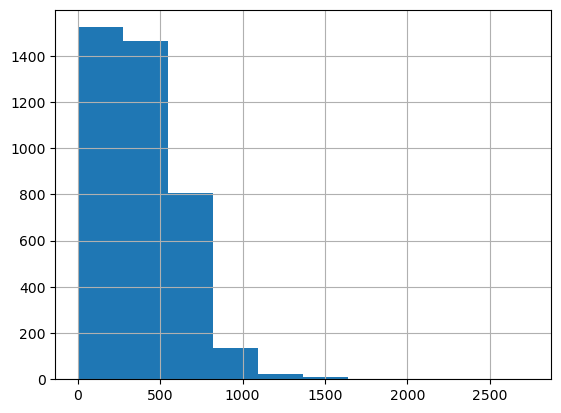

In [42]:
df['date'].value_counts().hist()

<Axes: >

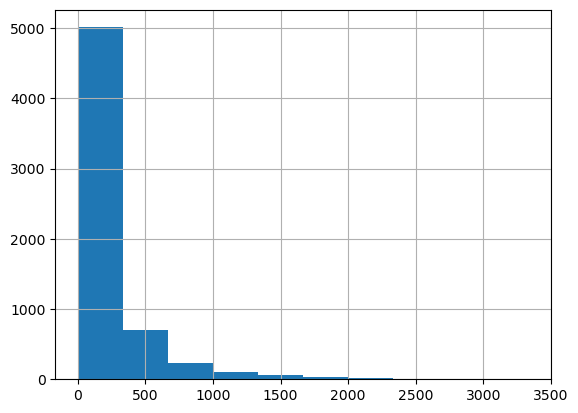

In [43]:
df['ticker'].value_counts().hist()

In [50]:
counts = df['ticker'].value_counts()
tickers = counts[counts > 300].index

df[df.ticker.isin(tickers)]

,date,timestamp,ticker,title
0,2020-06-05,2020-06-05 10:30:00-04:00,A,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03,2020-06-03 10:45:00-04:00,A,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26,2020-05-26 04:30:00-04:00,A,71 Biggest Movers From Friday
3,2020-05-22,2020-05-22 12:45:00-04:00,A,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22,2020-05-22 11:38:00-04:00,A,B of A Securities Maintains Neutral on Agilent...
...,...,...,...,...
1400397,2010-01-07,2010-01-07 13:24:00-05:00,ZUMZ,"Benzinga’s Volume Movers (INSP, SNCR, ZUMZ, UL..."
1400398,2010-01-07,2010-01-07 12:05:00-05:00,ZUMZ,"Unusual Volume Movers (INSP, ZUMZ, SNCR, ULTA)"
1400399,2010-01-07,2010-01-07 10:58:00-05:00,ZUMZ,"Retail Round-up (ZUMZ, ROST, LTD, COST, SHLD, ..."
1400400,2009-11-19,2009-11-19 17:27:00-05:00,ZUMZ,"After Hours Losers (ADCT, ARUN, WTSLA, ZUMZ, FL)"


In [31]:
df[df['ticker'].isna()]

,title,timestamp,ticker,date
2298,Sterne Agee Provides Color on Aaron's,NaN,NaN,NaN
2299,2011-07-20 06:43:00-04:00,AAN,NaN,AAN
3568,Goldman Sachs Updates on Car Parts,NaN,NaN,NaN
3569,2011-07-22 07:38:00-04:00,AAP,NaN,AAP
10257,American Campus to Offer 15M Shares,NaN,NaN,NaN
...,...,...,...,...
1397783,2012-03-02 13:04:00-05:00,ZNGA,NaN,ZNGA
1399443,Waiting on Several IPOs This Morning:,NaN,NaN,NaN
1399444,2013-11-15 09:38:00-05:00,ZU,NaN,ZU
1400295,Wall Street Strategies Reports On Retailers' S...,NaN,NaN,NaN


In [ ]:
df.

In [6]:
debug_path = os.path.join(DATA_DIR, 'debug.json')
df['stock'].value_counts().to_json(debug_path)

In [18]:
df[df['stock'] == 'MRK'].iloc[0, 1]

'Shares of several healthcare companies are trading lower in sympathy with the overall market following an increase in coronavirus cases in some US states that have reopened, leading to concerns of a second wave of the virus.'

In [19]:
df[df['stock'] == 'NDAQ']

,Unnamed: 0,title,date,stock
878343,890203.0,How Delisting Chinese Stocks Could Hurt Wall S...,2020-06-10 13:22:00-04:00,NDAQ
878344,890204.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,NDAQ
878345,890205.0,The NASDAQ Will Delist Ordinary Shares And War...,2020-06-01 16:08:00-04:00,NDAQ
878346,890206.0,NASDQ Postpones Monday Reopening Of PHLX Tradi...,2020-06-01 09:00:00-04:00,NDAQ
878347,890207.0,Nasdaq Scheduled Resumption in CNS Pharmaceuti...,2020-05-27 16:57:00-04:00,NDAQ
...,...,...,...,...
879450,891310.0,Why Did The US Market Drop Post FOMC?,2009-11-04 18:08:00-05:00,NDAQ
879451,891311.0,"Fast Money Recommendations For Thursday (PTR, ...",2009-10-28 19:14:00-04:00,NDAQ
879452,891312.0,"NASDAQ OMX Group, Inc. (NDAQ) Signs Agreement ...",2009-10-12 06:19:00-04:00,NDAQ
879453,891313.0,Nasdaq - Can It Hold The 1700 Level?,2009-10-01 09:38:00-04:00,NDAQ


In [21]:
dates = df['date'].unique()
dates

array(['2020-06-05 10:30:00-04:00', '2020-06-03 10:45:00-04:00',
       '2020-05-26 04:30:00-04:00', ..., '2011-06-21 08:26:00-04:00',
       '2011-06-21 05:59:00-04:00', '2011-05-12 09:36:00-04:00'],
      dtype=object)

<Axes: xlabel='date', ylabel='count'>

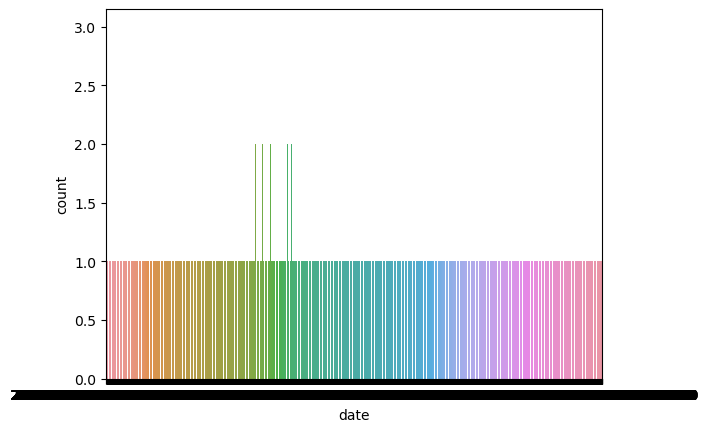

In [12]:
sns.countplot(df[df['stock'] == 'MRK'], x = 'date')